# Data Analysis Project part 2

### Purpose of this project:

The purpose of this project is to categorize the propety with unsupervised leaning with the data I am collection from craigslist. Analyze each category, so I could predict the rental price I can get from the property you are thinking to buy as investment purpose. 

* Load data that I have been collecting. 
* Add parameters
* Run unsupervised machine leaning to categorize the data. 
* Plot each category unsupervized learning categorized. -> Find out how it split the data. 
    * Price distribution
    * Price/SQFT distribution
    * Number of listing per Post Area code
    * Number of listing per number of bedrooms
    * Relationship between Price and SQFT
    * Number of suite furnished or not Furnished
    
    I hope to see some consitency of splitting the data for farther analysis. 
    
I will do the same process for entire dataset, Vancouver dataset, and Toronto dataset. 

In [5]:
from functions import add_params, subplot_by_cluster, remove_outliers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# As you can tell the number of scraped data is exceeding the number of the post, so I remove duplicate. 
df = pd.read_csv('.\Data\\rental_price_data.csv',).drop('Unnamed: 0', axis=1)
df.sort_values(by="Post Datetime", ascending=False, inplace=True)
len(df)

401087

In [3]:
data = add_params(df)
data.head()

,PostAreaCode,PostArea_coded,City Code,Area Code,Post Datetime,Post Date,Post Time,Post Title,Post URL,Neighborhood,Bedroom,SQFT,Price,IsFurnished,Price/SQFT,price_range
0,TORTOR,5,TOR,TOR,2023-01-10 21:13:00,2023-01-10,21:13:00,2 Bed - 1 Bath - Lower Level Unit w/ Private E...,https://toronto.craigslist.org/tor/apa/d/scarb...,scarborough,2,750.0,2495,0,3.326667,1
3,TORTOR,5,TOR,TOR,2023-01-10 21:12:00,2023-01-10,21:12:00,Lovely 3 Bed 1 Bath Lower Level Unit with Priv...,https://toronto.craigslist.org/tor/apa/d/toron...,york,3,850.0,4495,0,5.288235,3
4,TORTOR,5,TOR,TOR,2023-01-10 21:12:00,2023-01-10,21:12:00,Furnished 1 Bed Basement Suite in Queen West w...,https://toronto.craigslist.org/tor/apa/d/west-...,west queen west,1,790.0,2595,1,3.284810,1
1,TOROAK,4,TOR,OAK,2023-01-10 21:12:00,2023-01-10,21:12:00,High End 2 Bed 2 Bath Furnished Condo with Cit...,https://toronto.craigslist.org/tor/apa/d/toron...,toronto,2,1200.0,8695,1,7.245833,4
2,TOROAK,4,TOR,OAK,2023-01-10 21:12:00,2023-01-10,21:12:00,Gorgeous 2 Bed 2 Bath Condo at The Liberties,https://toronto.craigslist.org/tor/apa/d/downt...,downtown toronto,2,1100.0,4495,0,4.086364,2


In [4]:
len(data)

21211

In [6]:
# Remove outliers
data = remove_outliers(data)

Original DataFrame Size:21211
Number of Dropped Rows: 76
DataFrame size after drop rows: 21135


In [7]:
van_data = data[data["City Code"] == "VAN"]
tor_data = data[data["City Code"] == 'TOR']
fv_data = data[data['City Code'] == 'ABB']
len(van_data), len(tor_data), len(fv_data)

(13947, 5133, 2055)

## Apply to entire data

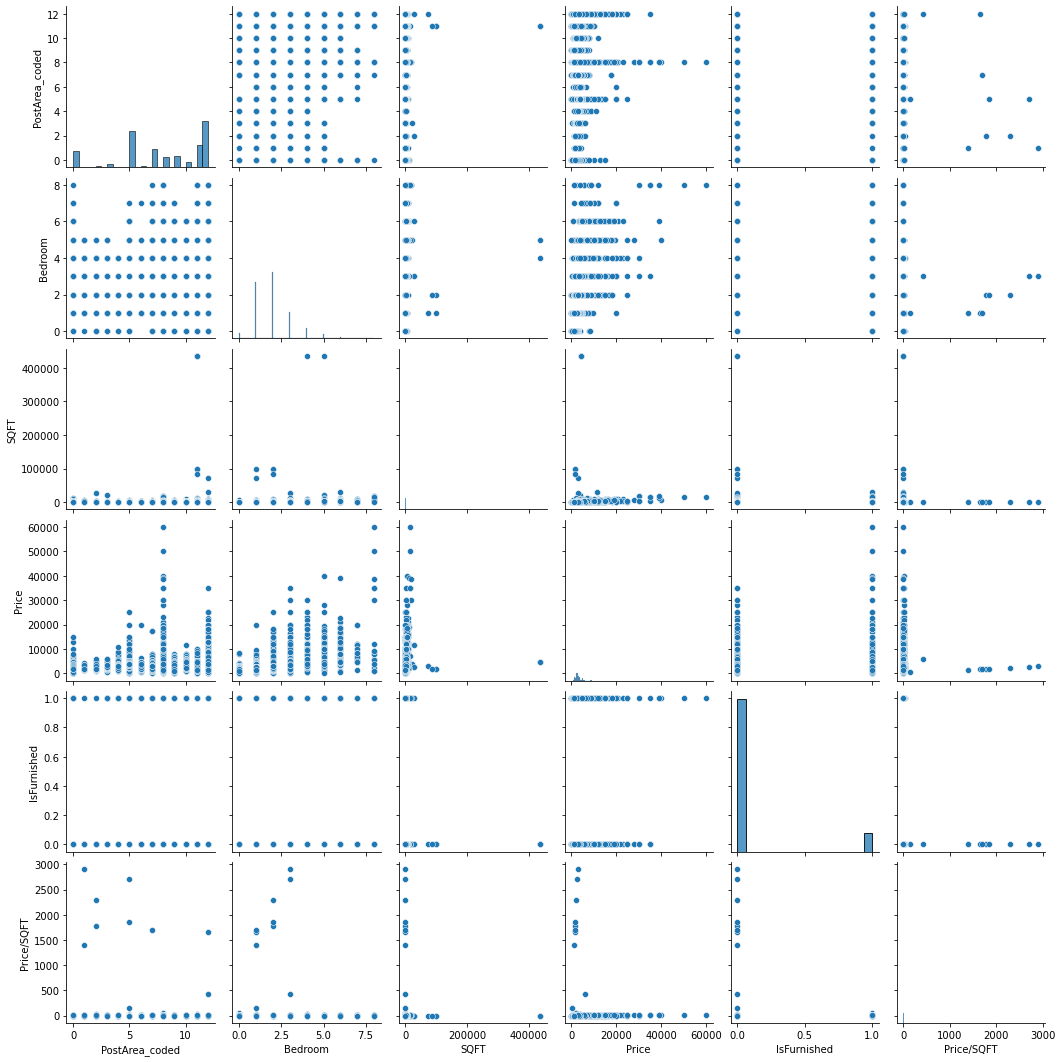

In [8]:
sns.pairplot(data)

In [9]:
data["PostArea_coded"].value_counts()

12    5665
5     4423
11    2779
7     2228
0     2055
9     1412
8     1240
10     623
3      337
6      131
2       91
1       81
4       70
Name: PostArea_coded, dtype: int64

In [10]:
# Run KMeans to categorize the properties
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X = pd.get_dummies(data[["PostArea_coded", "Bedroom", "SQFT", "Price", "IsFurnished", "Price/SQFT"]])

scaler.fit(X)

kmeans = KMeans(n_clusters=8)

kmeans.fit(X)

cluster_labels = kmeans.predict(X)

print(cluster_labels)

[7 5 7 ... 7 7 0]


In [11]:
data['cluster_labels'] = cluster_labels

In [12]:
data.corr()

,PostArea_coded,Bedroom,SQFT,Price,IsFurnished,Price/SQFT,cluster_labels
PostArea_coded,1.000000,-0.088413,0.034347,0.112281,0.176172,-0.002610,0.021156
Bedroom,-0.088413,1.000000,0.131508,0.491046,-0.087331,-0.010331,0.286618
SQFT,0.034347,0.131508,1.000000,0.121506,0.004781,-0.002482,0.006979
Price,0.112281,0.491046,0.121506,1.000000,0.117834,-0.001720,0.275109
IsFurnished,0.176172,-0.087331,0.004781,0.117834,1.000000,0.003402,0.051528
Price/SQFT,-0.002610,-0.010331,-0.002482,-0.001720,0.003402,1.000000,-0.004462
cluster_labels,0.021156,0.286618,0.006979,0.275109,0.051528,-0.004462,1.000000


cluster_label: 0
Length of DataFrame: 7513


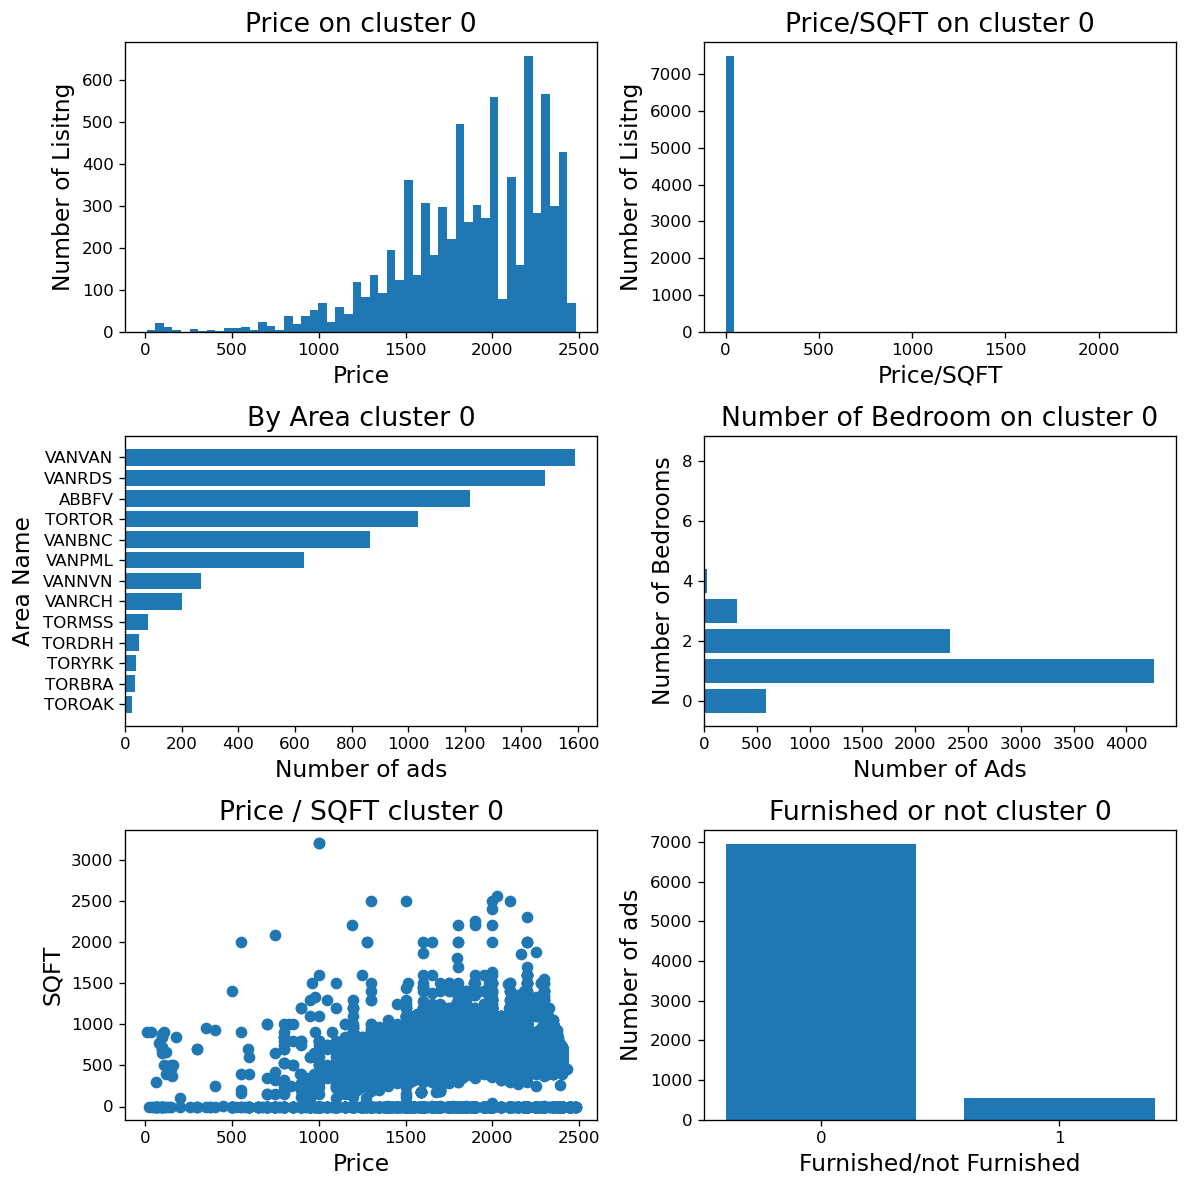

Correlation Matrix cluster 0: 
                PostArea_coded   Bedroom      SQFT     Price  IsFurnished  \
PostArea_coded        1.000000 -0.186308  0.015380  0.082044     0.101919   
Bedroom              -0.186308  1.000000  0.207311  0.068890    -0.112902   
SQFT                  0.015380  0.207311  1.000000  0.146394    -0.034320   
Price                 0.082044  0.068890  0.146394  1.000000    -0.048707   
IsFurnished           0.101919 -0.112902 -0.034320 -0.048707     1.000000   
Price/SQFT           -0.012180 -0.002382 -0.018457  0.006282    -0.005698   
cluster_labels             NaN       NaN       NaN       NaN          NaN   

                Price/SQFT  cluster_labels  
PostArea_coded   -0.012180             NaN  
Bedroom          -0.002382             NaN  
SQFT             -0.018457             NaN  
Price             0.006282             NaN  
IsFurnished      -0.005698             NaN  
Price/SQFT        1.000000             NaN  
cluster_labels         NaN           

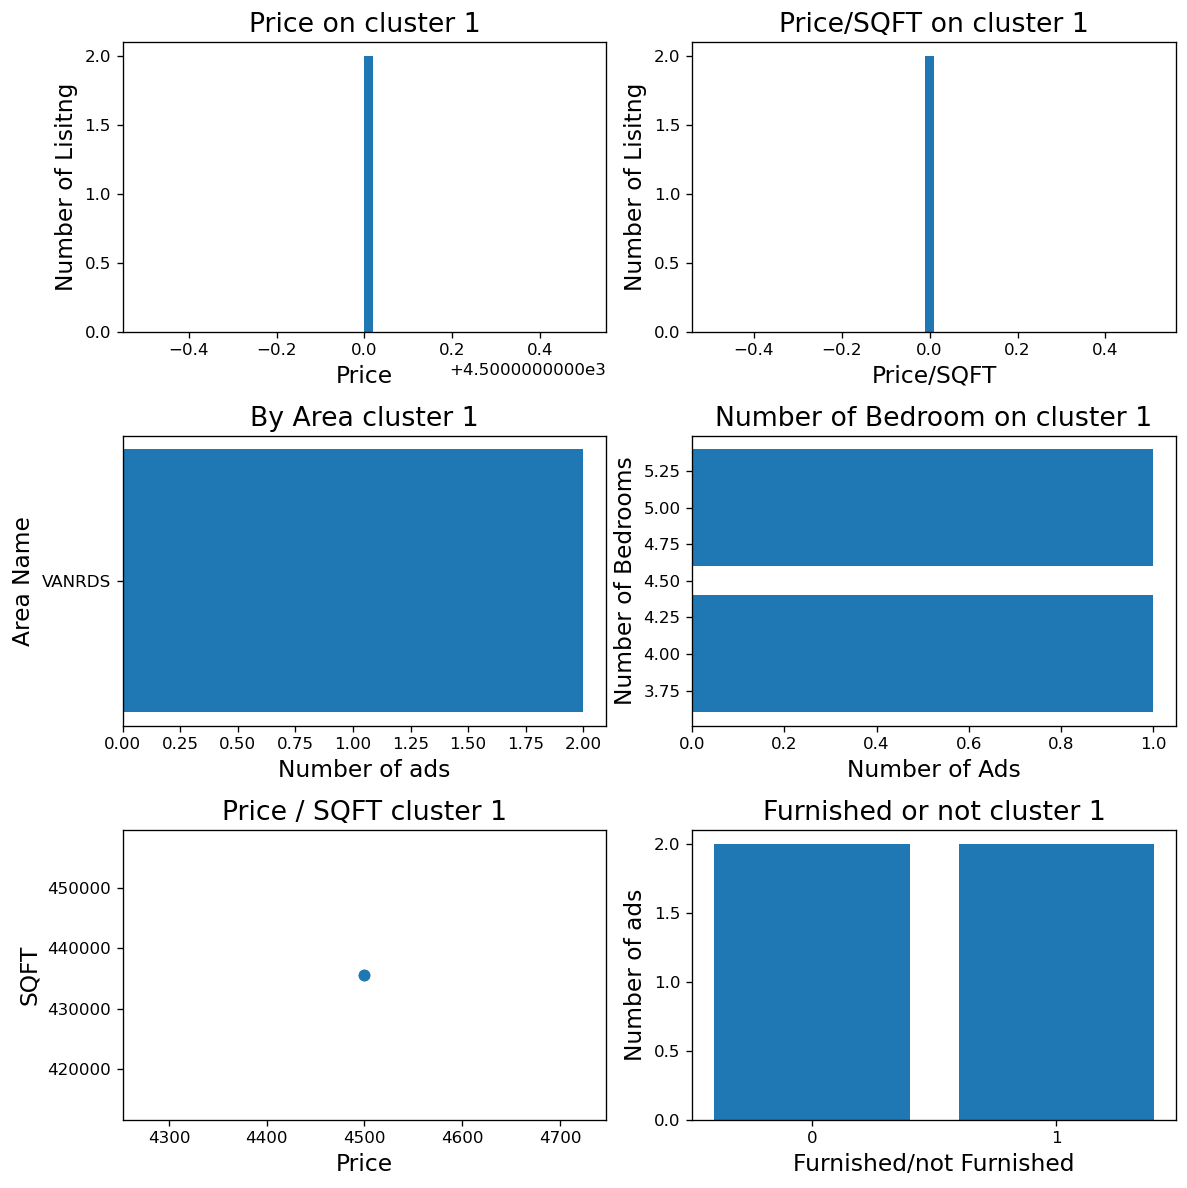

Correlation Matrix cluster 1: 
                PostArea_coded  Bedroom  SQFT  Price  IsFurnished  Price/SQFT  \
PostArea_coded             NaN      NaN   NaN    NaN          NaN         NaN   
Bedroom                    NaN      1.0   NaN    NaN          NaN         NaN   
SQFT                       NaN      NaN   NaN    NaN          NaN         NaN   
Price                      NaN      NaN   NaN    NaN          NaN         NaN   
IsFurnished                NaN      NaN   NaN    NaN          NaN         NaN   
Price/SQFT                 NaN      NaN   NaN    NaN          NaN         NaN   
cluster_labels             NaN      NaN   NaN    NaN          NaN         NaN   

                cluster_labels  
PostArea_coded             NaN  
Bedroom                    NaN  
SQFT                       NaN  
Price                      NaN  
IsFurnished                NaN  
Price/SQFT                 NaN  
cluster_labels             NaN  




cluster_label: 2
Length of DataFrame: 744


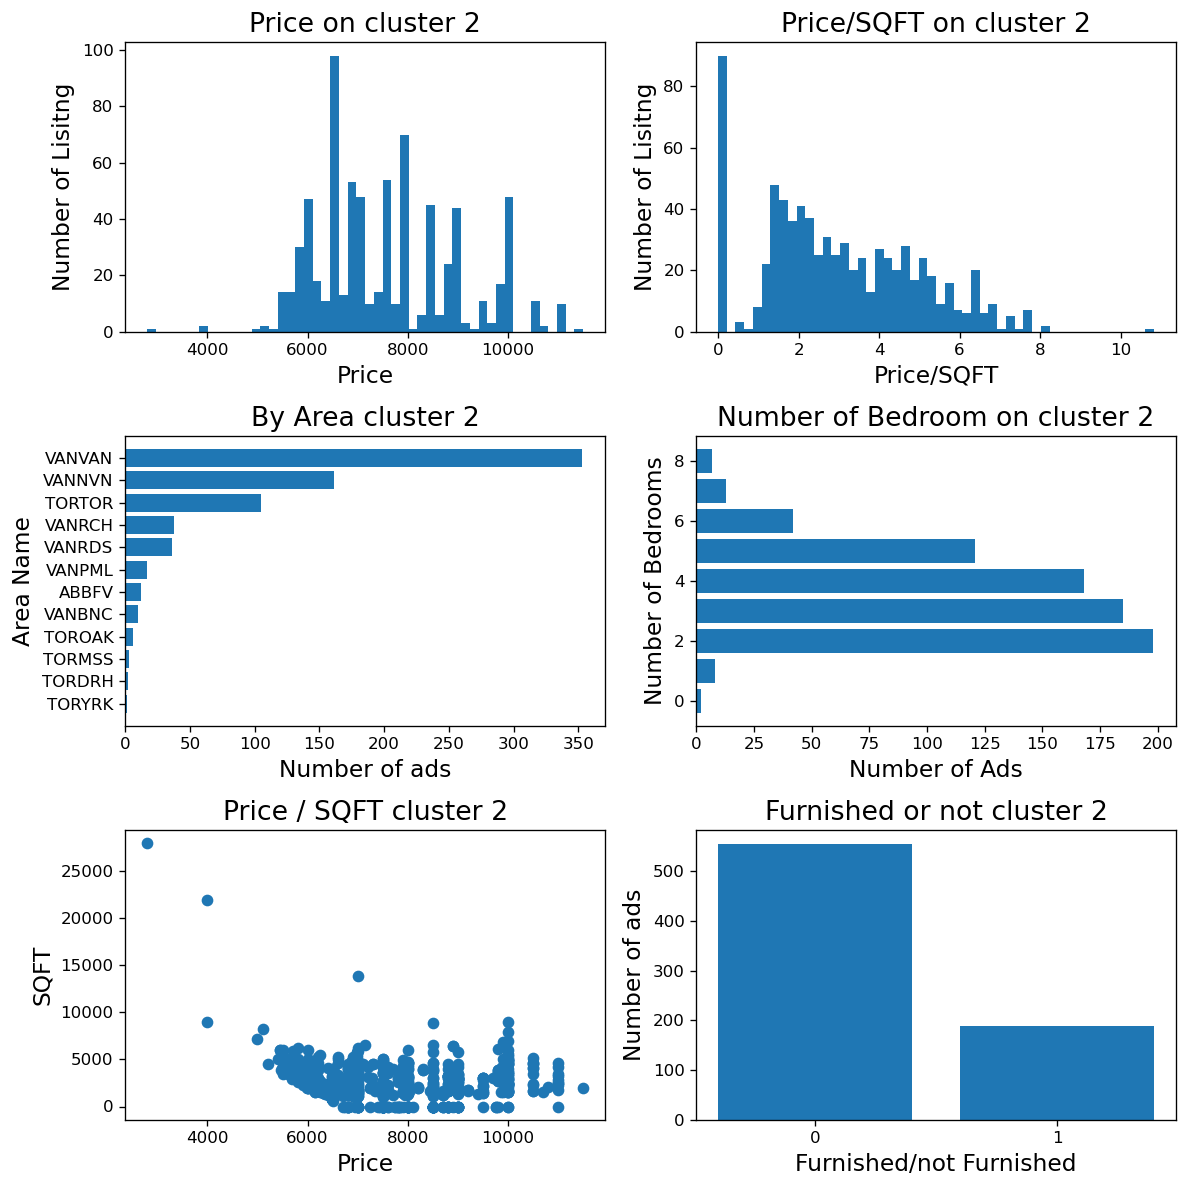

Correlation Matrix cluster 2: 
                PostArea_coded   Bedroom      SQFT     Price  IsFurnished  \
PostArea_coded        1.000000  0.034987  0.058919  0.040826     0.170619   
Bedroom               0.034987  1.000000  0.527854 -0.078051    -0.122782   
SQFT                  0.058919  0.527854  1.000000 -0.141659    -0.087746   
Price                 0.040826 -0.078051 -0.141659  1.000000     0.044788   
IsFurnished           0.170619 -0.122782 -0.087746  0.044788     1.000000   
Price/SQFT            0.365051 -0.433250 -0.251536  0.133317     0.292443   
cluster_labels             NaN       NaN       NaN       NaN          NaN   

                Price/SQFT  cluster_labels  
PostArea_coded    0.365051             NaN  
Bedroom          -0.433250             NaN  
SQFT             -0.251536             NaN  
Price             0.133317             NaN  
IsFurnished       0.292443             NaN  
Price/SQFT        1.000000             NaN  
cluster_labels         NaN           

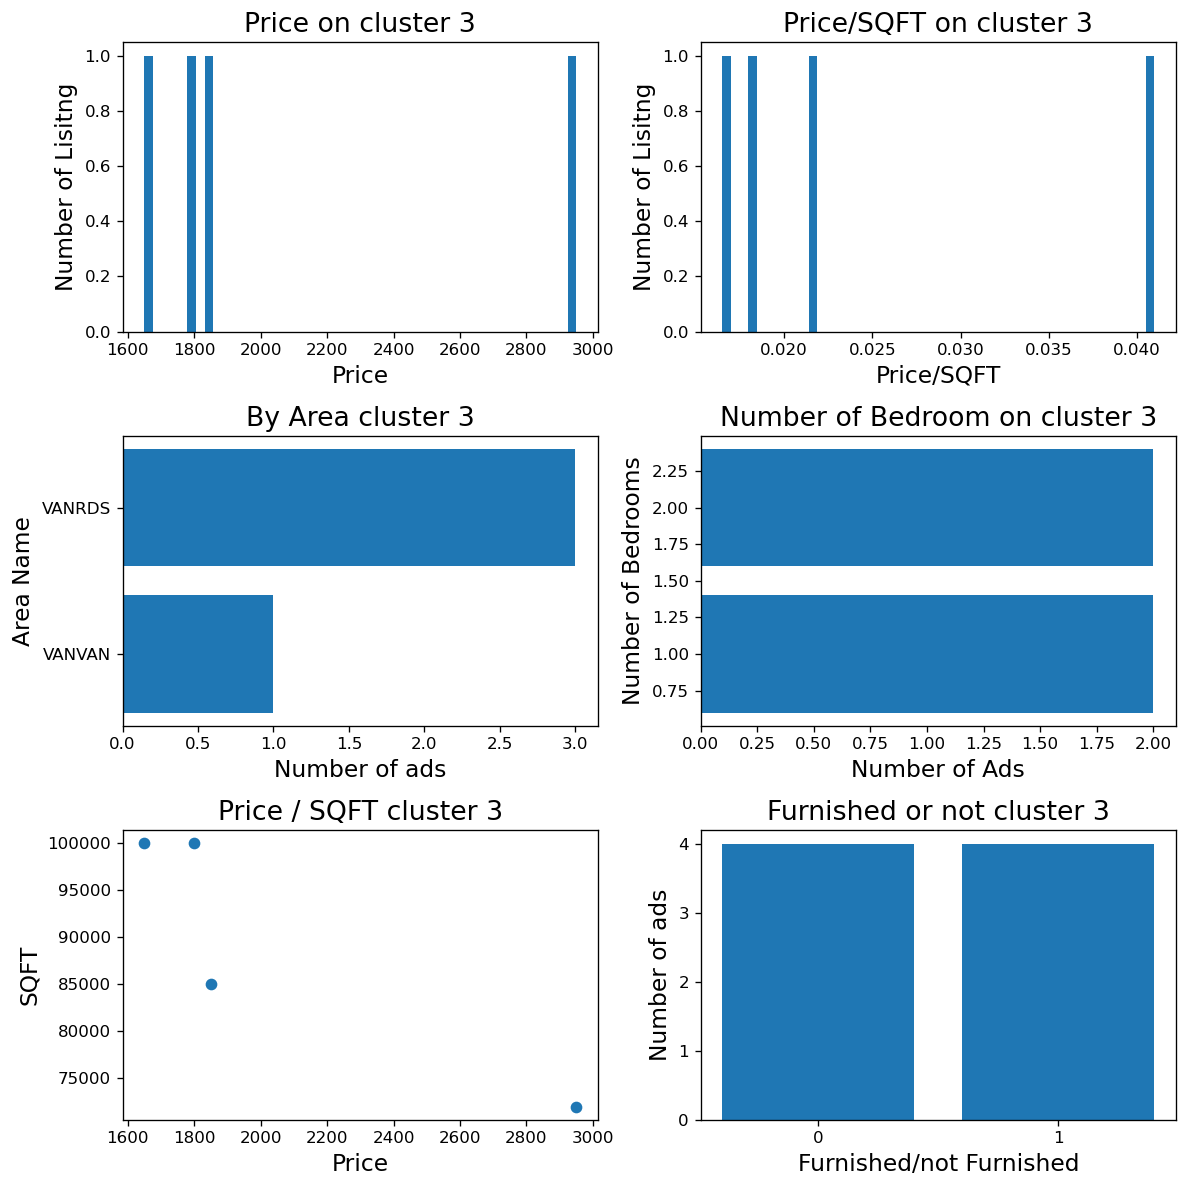

Correlation Matrix cluster 3: 
                PostArea_coded   Bedroom      SQFT     Price  IsFurnished  \
PostArea_coded        1.000000 -0.577350 -0.851852  0.989842          NaN   
Bedroom              -0.577350  1.000000  0.277983 -0.458798          NaN   
SQFT                 -0.851852  0.277983  1.000000 -0.894833          NaN   
Price                 0.989842 -0.458798 -0.894833  1.000000          NaN   
IsFurnished                NaN       NaN       NaN       NaN          NaN   
Price/SQFT            0.980702 -0.451276 -0.933825  0.994800          NaN   
cluster_labels             NaN       NaN       NaN       NaN          NaN   

                Price/SQFT  cluster_labels  
PostArea_coded    0.980702             NaN  
Bedroom          -0.451276             NaN  
SQFT             -0.933825             NaN  
Price             0.994800             NaN  
IsFurnished            NaN             NaN  
Price/SQFT        1.000000             NaN  
cluster_labels         NaN           

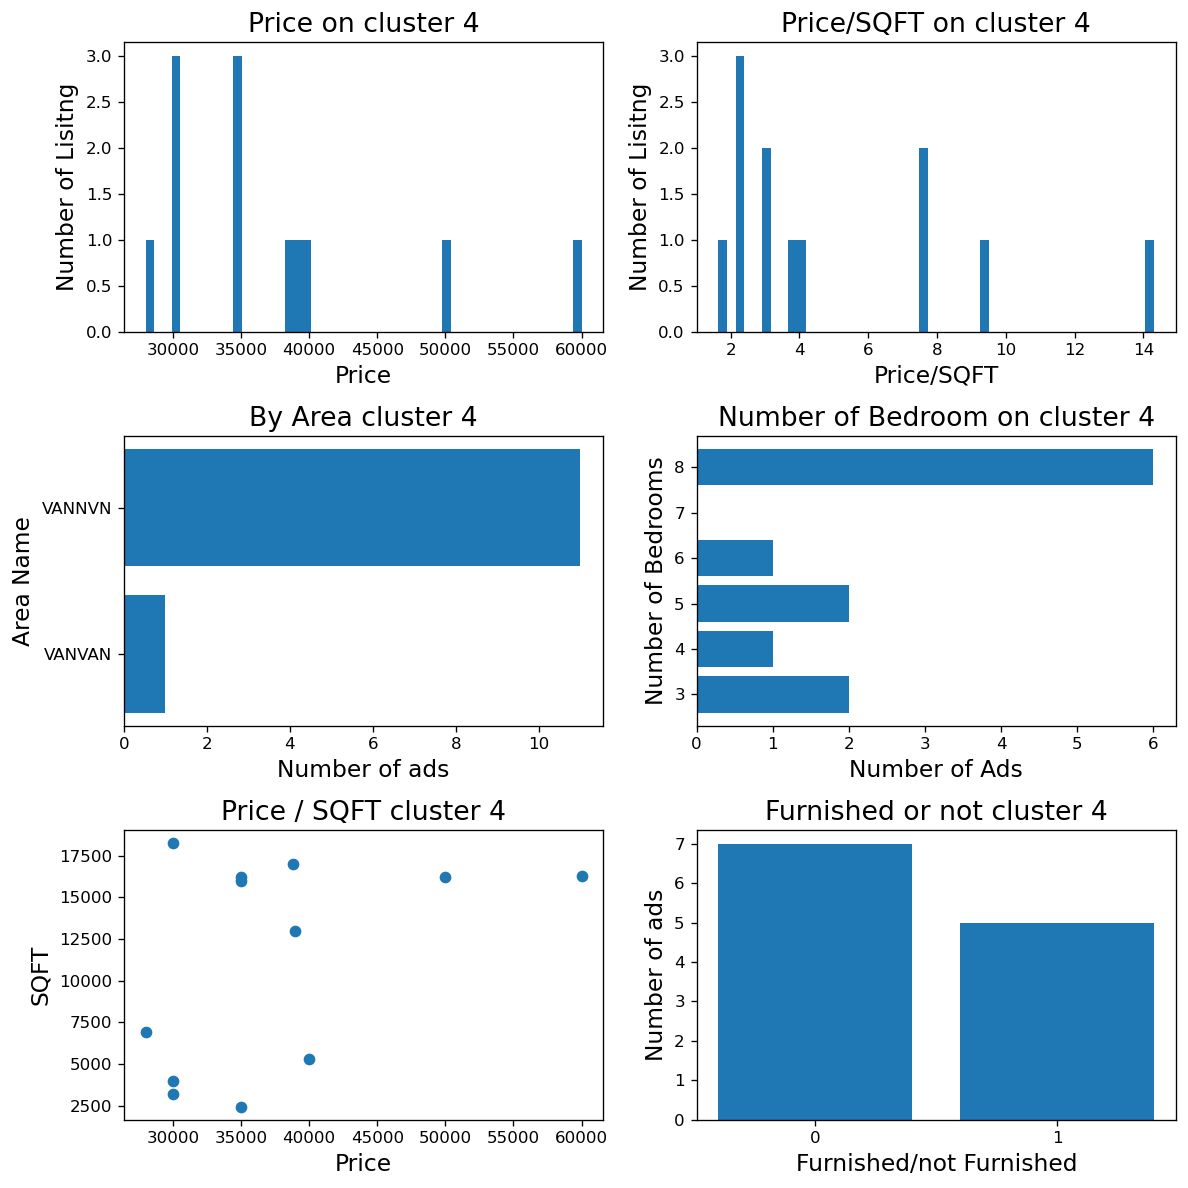

Correlation Matrix cluster 4: 
                PostArea_coded   Bedroom      SQFT     Price  IsFurnished  \
PostArea_coded        1.000000 -0.479059 -0.441518 -0.086894    -0.356753   
Bedroom              -0.479059  1.000000  0.972777  0.467469     0.325107   
SQFT                 -0.441518  0.972777  1.000000  0.425042     0.242058   
Price                -0.086894  0.467469  0.425042  1.000000     0.566480   
IsFurnished          -0.356753  0.325107  0.242058  0.566480     1.000000   
Price/SQFT            0.754479 -0.859408 -0.875989 -0.203964    -0.198953   
cluster_labels             NaN       NaN       NaN       NaN          NaN   

                Price/SQFT  cluster_labels  
PostArea_coded    0.754479             NaN  
Bedroom          -0.859408             NaN  
SQFT             -0.875989             NaN  
Price            -0.203964             NaN  
IsFurnished      -0.198953             NaN  
Price/SQFT        1.000000             NaN  
cluster_labels         NaN           

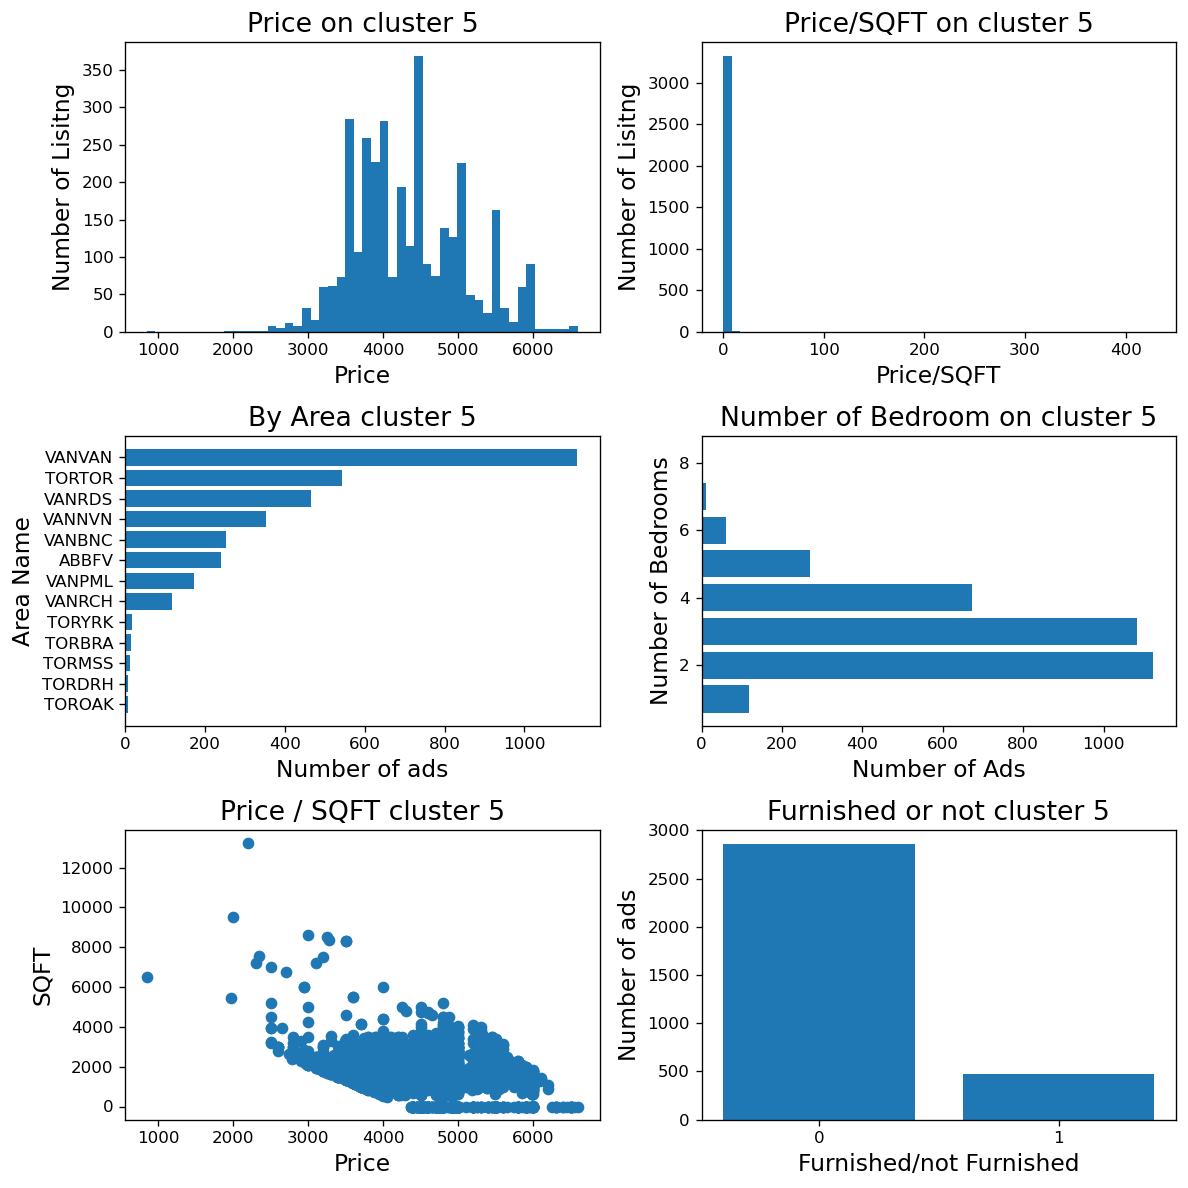

Correlation Matrix cluster 5: 
                PostArea_coded   Bedroom      SQFT     Price  IsFurnished  \
PostArea_coded        1.000000 -0.213928 -0.054836  0.106204     0.128841   
Bedroom              -0.213928  1.000000  0.498549 -0.109570    -0.254301   
SQFT                 -0.054836  0.498549  1.000000 -0.334281    -0.114657   
Price                 0.106204 -0.109570 -0.334281  1.000000     0.130153   
IsFurnished           0.128841 -0.254301 -0.114657  0.130153     1.000000   
Price/SQFT            0.103989 -0.117711 -0.055625  0.061895     0.063989   
cluster_labels             NaN       NaN       NaN       NaN          NaN   

                Price/SQFT  cluster_labels  
PostArea_coded    0.103989             NaN  
Bedroom          -0.117711             NaN  
SQFT             -0.055625             NaN  
Price             0.061895             NaN  
IsFurnished       0.063989             NaN  
Price/SQFT        1.000000             NaN  
cluster_labels         NaN           

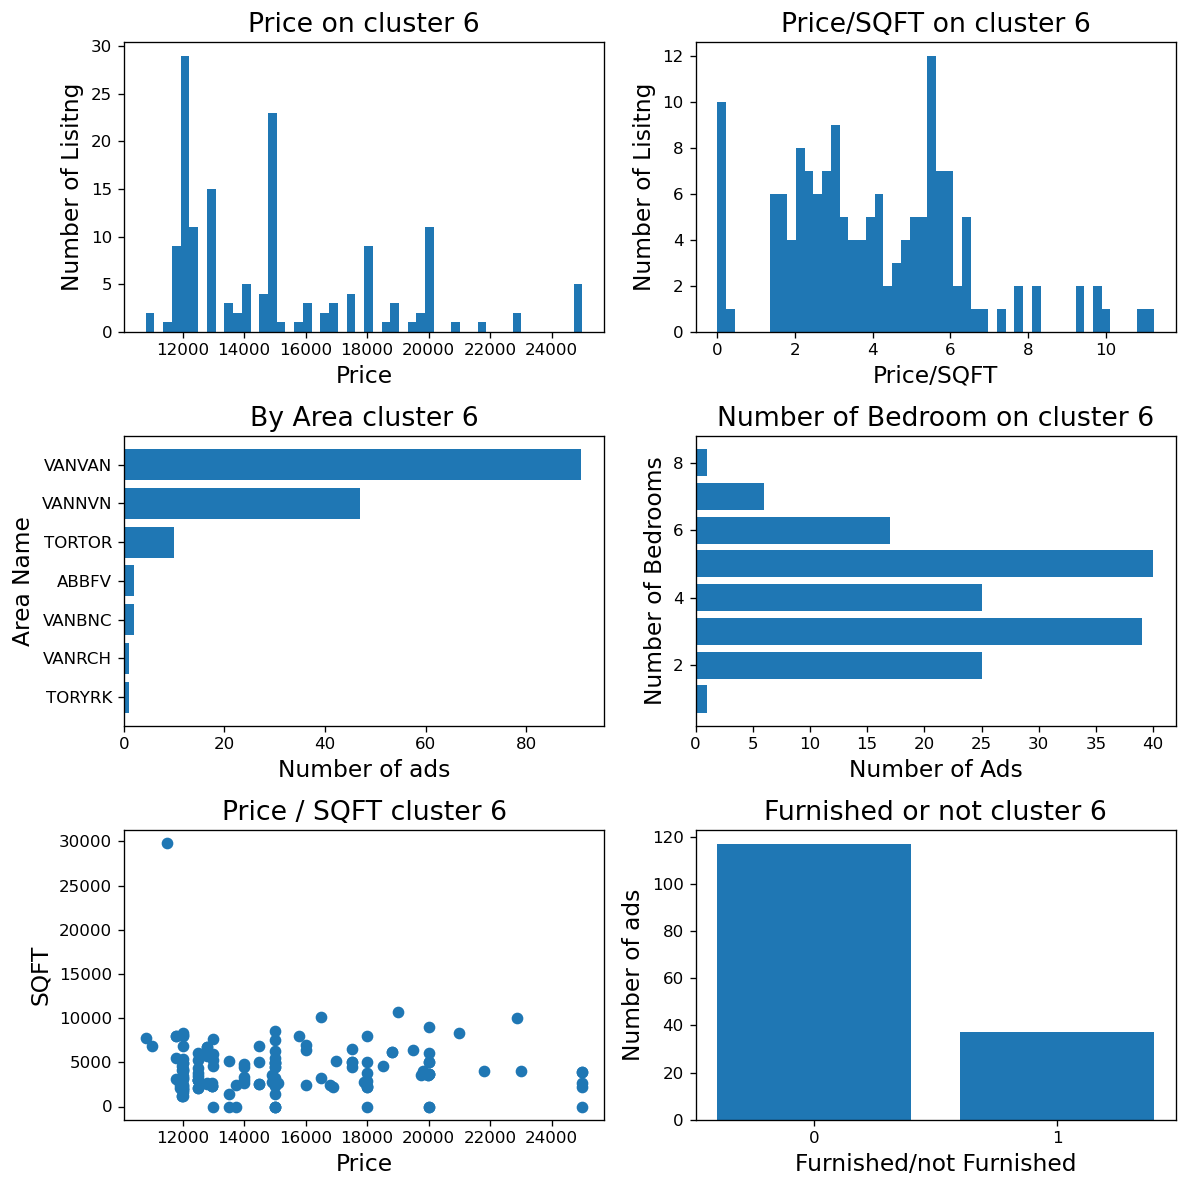

Correlation Matrix cluster 6: 
                PostArea_coded   Bedroom      SQFT     Price  IsFurnished  \
PostArea_coded        1.000000 -0.179377 -0.006066 -0.001874     0.182149   
Bedroom              -0.179377  1.000000  0.650029 -0.014048    -0.051832   
SQFT                 -0.006066  0.650029  1.000000 -0.008614     0.036645   
Price                -0.001874 -0.014048 -0.008614  1.000000     0.024575   
IsFurnished           0.182149 -0.051832  0.036645  0.024575     1.000000   
Price/SQFT            0.443373 -0.527083 -0.391002  0.142115     0.124393   
cluster_labels             NaN       NaN       NaN       NaN          NaN   

                Price/SQFT  cluster_labels  
PostArea_coded    0.443373             NaN  
Bedroom          -0.527083             NaN  
SQFT             -0.391002             NaN  
Price             0.142115             NaN  
IsFurnished       0.124393             NaN  
Price/SQFT        1.000000             NaN  
cluster_labels         NaN           

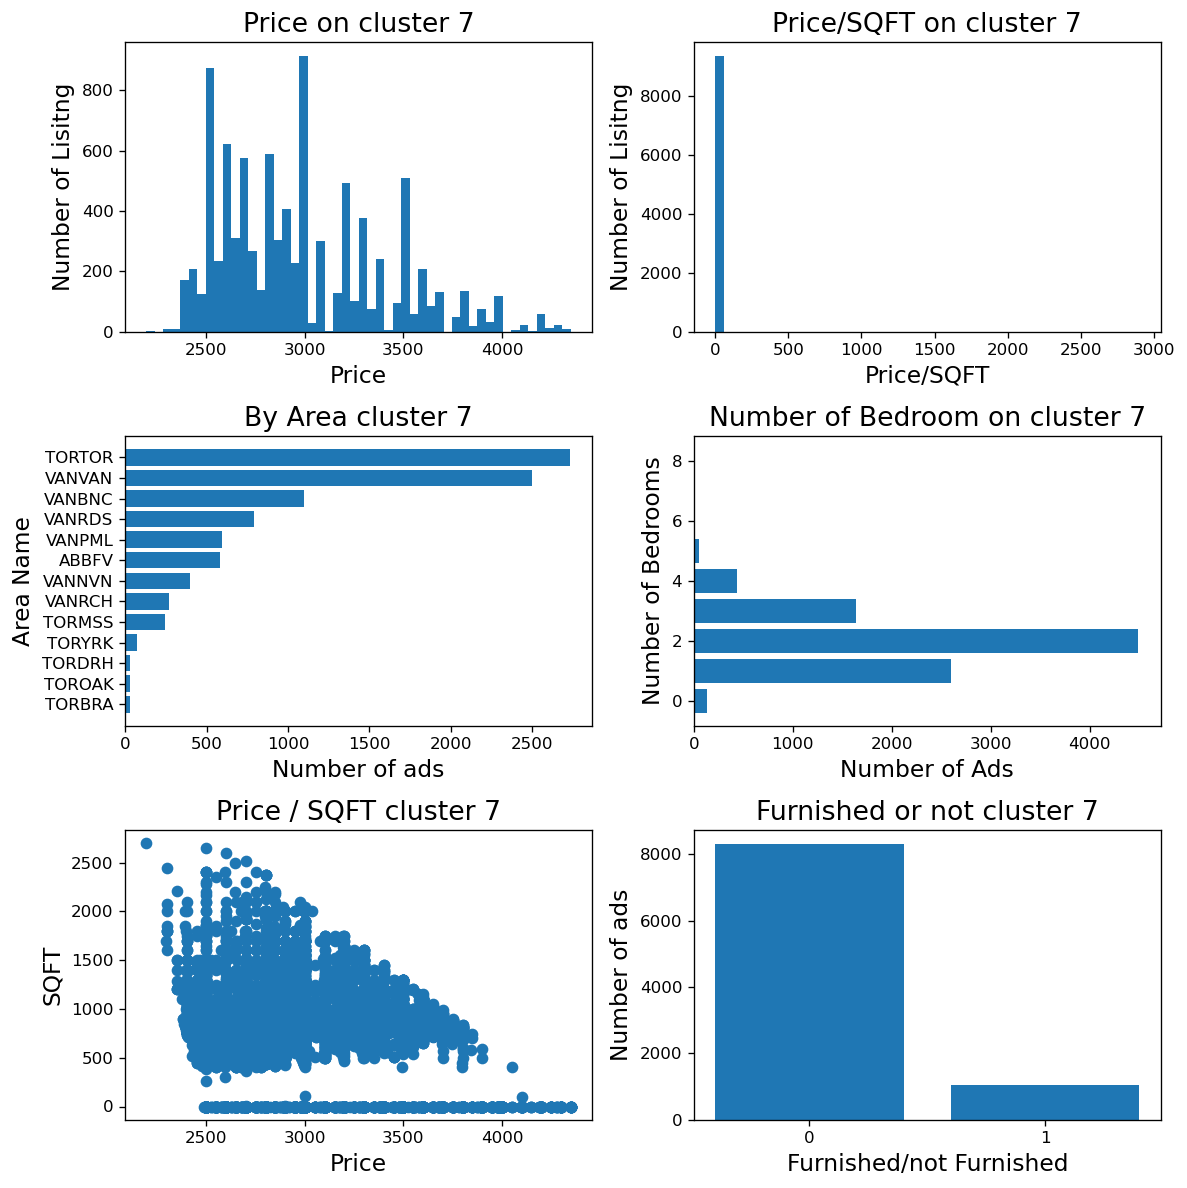

Correlation Matrix cluster 7: 
                PostArea_coded   Bedroom      SQFT     Price  IsFurnished  \
PostArea_coded        1.000000 -0.260394  0.175293 -0.037328     0.235584   
Bedroom              -0.260394  1.000000  0.080256  0.352622    -0.240528   
SQFT                  0.175293  0.080256  1.000000 -0.238170     0.006814   
Price                -0.037328  0.352622 -0.238170  1.000000    -0.022135   
IsFurnished           0.235584 -0.240528  0.006814 -0.022135     1.000000   
Price/SQFT            0.000817 -0.005887  0.005357 -0.016481     0.006961   
cluster_labels             NaN       NaN       NaN       NaN          NaN   

                Price/SQFT  cluster_labels  
PostArea_coded    0.000817             NaN  
Bedroom          -0.005887             NaN  
SQFT              0.005357             NaN  
Price            -0.016481             NaN  
IsFurnished       0.006961             NaN  
Price/SQFT        1.000000             NaN  
cluster_labels         NaN           

In [13]:
# Plot result by the cluster
for i in range(len(set(cluster_labels))):
    subplot_by_cluster(data, i)
    cluster = data[data['cluster_labels'] == i]
    print(f"Correlation Matrix cluster {i}: \n{cluster.corr()}")
    print('\n\n\n')
    

In [14]:
data['IsFurnished'].value_counts()

0    18820
1     2315
Name: IsFurnished, dtype: int64

In [15]:
# Furnished percentage
non_furnished = len(data[data['IsFurnished'] == 0]) 
furnished = len(data[data['IsFurnished'] == 1])
percentage = furnished / (non_furnished + furnished)
percentage

0.10953394842678023

## Apply same thing to just Vancouver data

In [16]:
# Run KMeans to categorize the properties
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X = pd.get_dummies(van_data[["PostArea_coded", "Bedroom", "SQFT", "Price", "IsFurnished", "Price/SQFT"]])

scaler.fit(X)

kmeans = KMeans(n_clusters=8)

kmeans.fit(X)

cluster_labels = kmeans.predict(X)

print(cluster_labels)

[5 5 0 ... 2 5 2]


In [17]:
van_data["cluster_labels"] = cluster_labels

C:\Users\Masa\AppData\Local\Temp\ipykernel_2148\3464756517.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  van_data["cluster_labels"] = cluster_labels


cluster_label: 0
Length of DataFrame: 1769


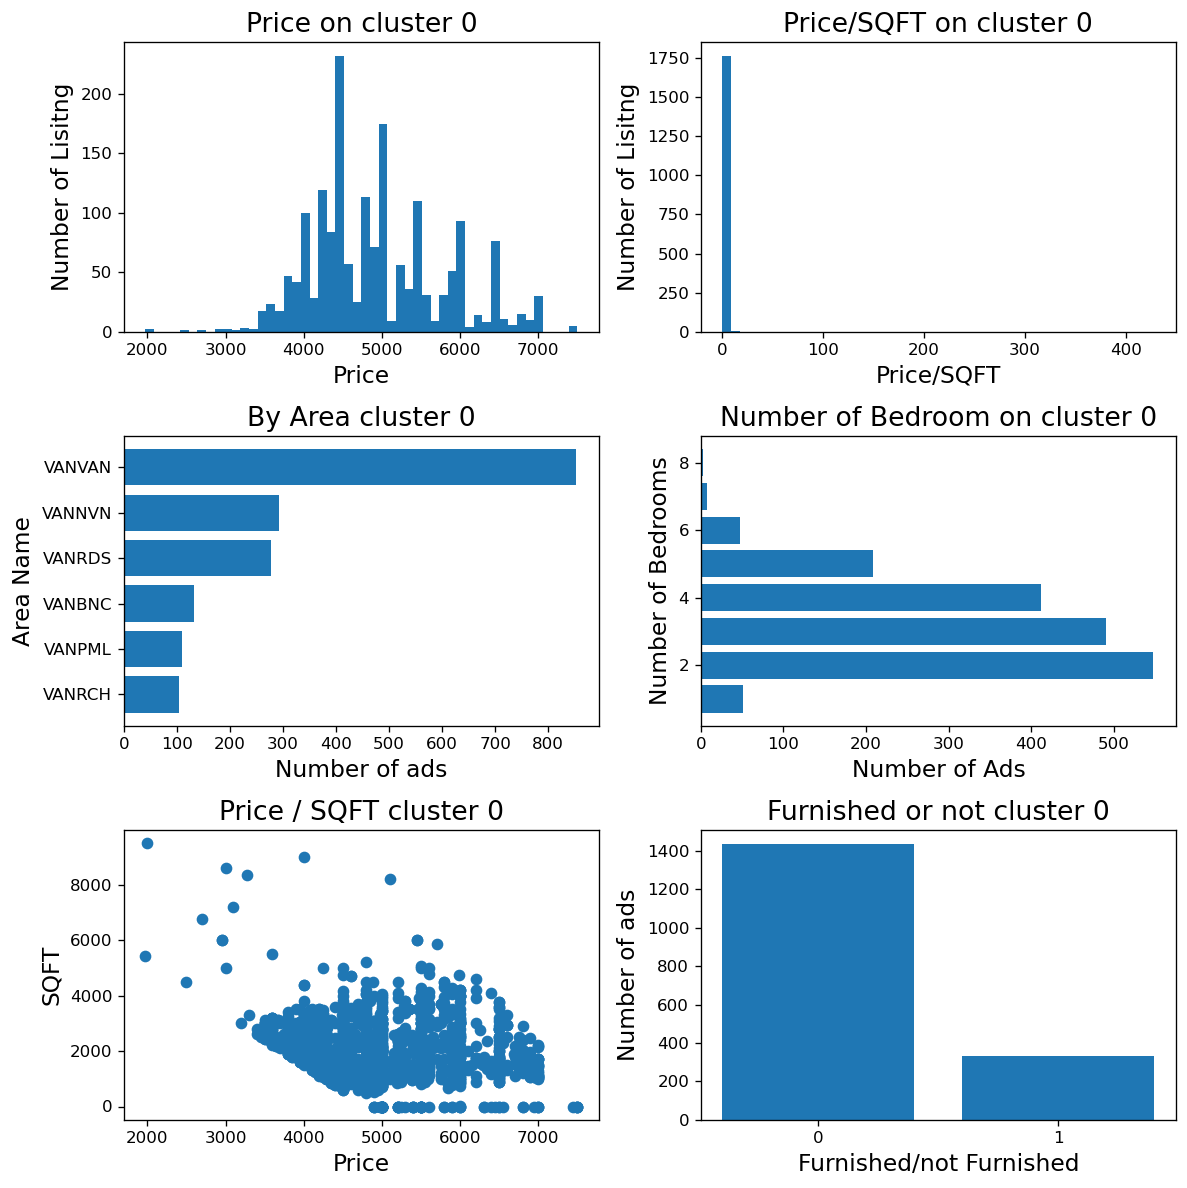

Correlation Matrix cluster 0: 
                PostArea_coded   Bedroom      SQFT     Price  IsFurnished  \
PostArea_coded        1.000000 -0.186308  0.015380  0.082044     0.101919   
Bedroom              -0.186308  1.000000  0.207311  0.068890    -0.112902   
SQFT                  0.015380  0.207311  1.000000  0.146394    -0.034320   
Price                 0.082044  0.068890  0.146394  1.000000    -0.048707   
IsFurnished           0.101919 -0.112902 -0.034320 -0.048707     1.000000   
Price/SQFT           -0.012180 -0.002382 -0.018457  0.006282    -0.005698   
cluster_labels             NaN       NaN       NaN       NaN          NaN   

                Price/SQFT  cluster_labels  
PostArea_coded   -0.012180             NaN  
Bedroom          -0.002382             NaN  
SQFT             -0.018457             NaN  
Price             0.006282             NaN  
IsFurnished      -0.005698             NaN  
Price/SQFT        1.000000             NaN  
cluster_labels         NaN           

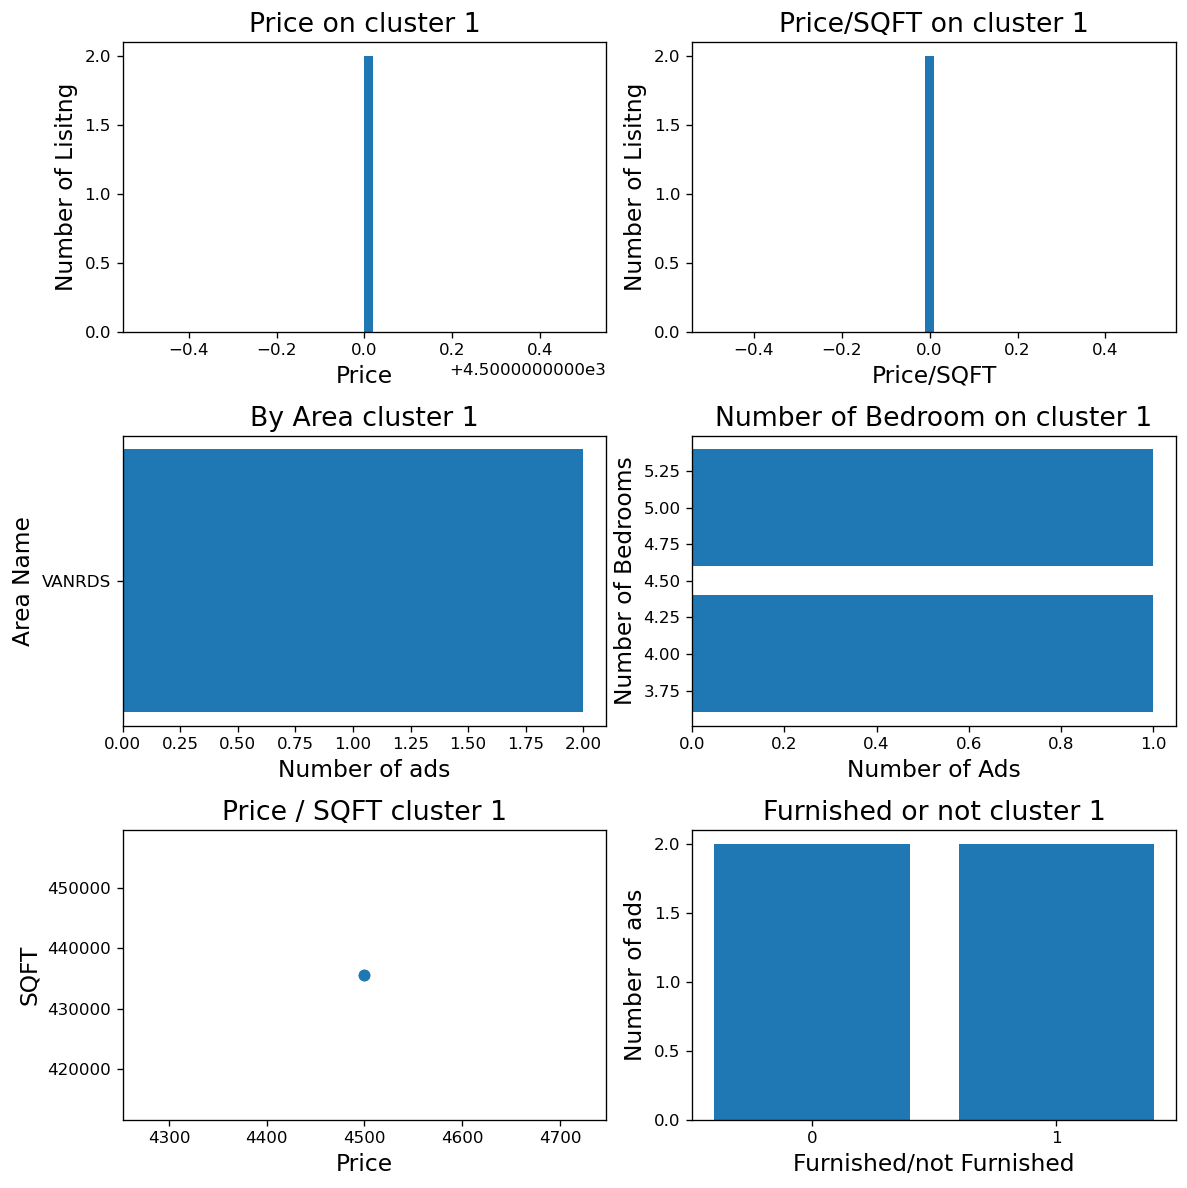

Correlation Matrix cluster 1: 
                PostArea_coded  Bedroom  SQFT  Price  IsFurnished  Price/SQFT  \
PostArea_coded             NaN      NaN   NaN    NaN          NaN         NaN   
Bedroom                    NaN      1.0   NaN    NaN          NaN         NaN   
SQFT                       NaN      NaN   NaN    NaN          NaN         NaN   
Price                      NaN      NaN   NaN    NaN          NaN         NaN   
IsFurnished                NaN      NaN   NaN    NaN          NaN         NaN   
Price/SQFT                 NaN      NaN   NaN    NaN          NaN         NaN   
cluster_labels             NaN      NaN   NaN    NaN          NaN         NaN   

                cluster_labels  
PostArea_coded             NaN  
Bedroom                    NaN  
SQFT                       NaN  
Price                      NaN  
IsFurnished                NaN  
Price/SQFT                 NaN  
cluster_labels             NaN  
cluster_label: 2
Length of DataFrame: 6185


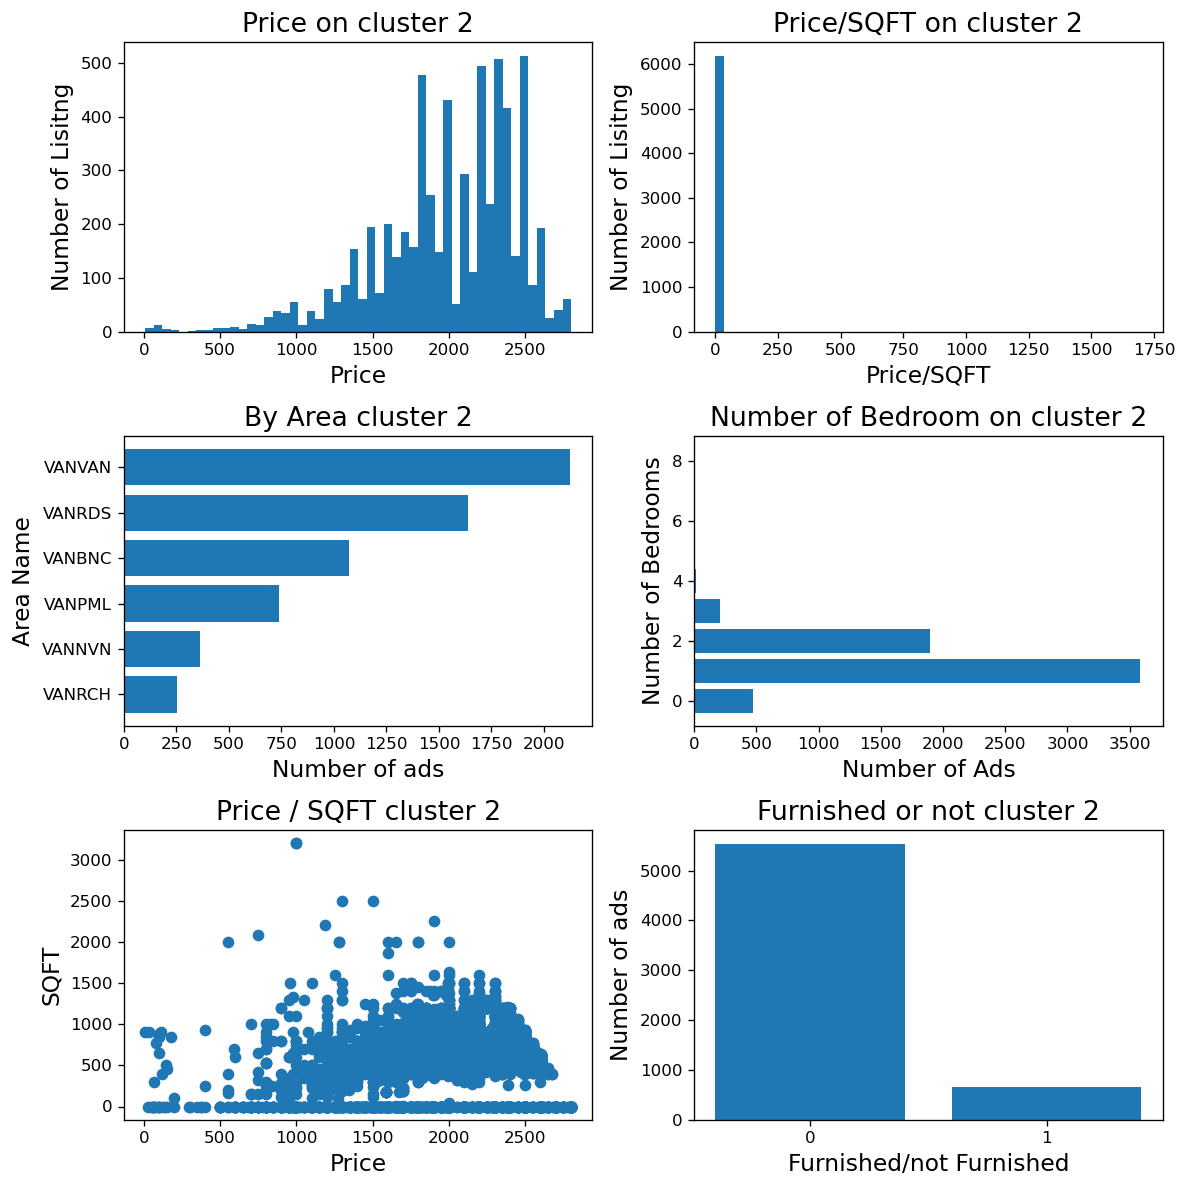

Correlation Matrix cluster 2: 
                PostArea_coded   Bedroom      SQFT     Price  IsFurnished  \
PostArea_coded        1.000000  0.034987  0.058919  0.040826     0.170619   
Bedroom               0.034987  1.000000  0.527854 -0.078051    -0.122782   
SQFT                  0.058919  0.527854  1.000000 -0.141659    -0.087746   
Price                 0.040826 -0.078051 -0.141659  1.000000     0.044788   
IsFurnished           0.170619 -0.122782 -0.087746  0.044788     1.000000   
Price/SQFT            0.365051 -0.433250 -0.251536  0.133317     0.292443   
cluster_labels             NaN       NaN       NaN       NaN          NaN   

                Price/SQFT  cluster_labels  
PostArea_coded    0.365051             NaN  
Bedroom          -0.433250             NaN  
SQFT             -0.251536             NaN  
Price             0.133317             NaN  
IsFurnished       0.292443             NaN  
Price/SQFT        1.000000             NaN  
cluster_labels         NaN           

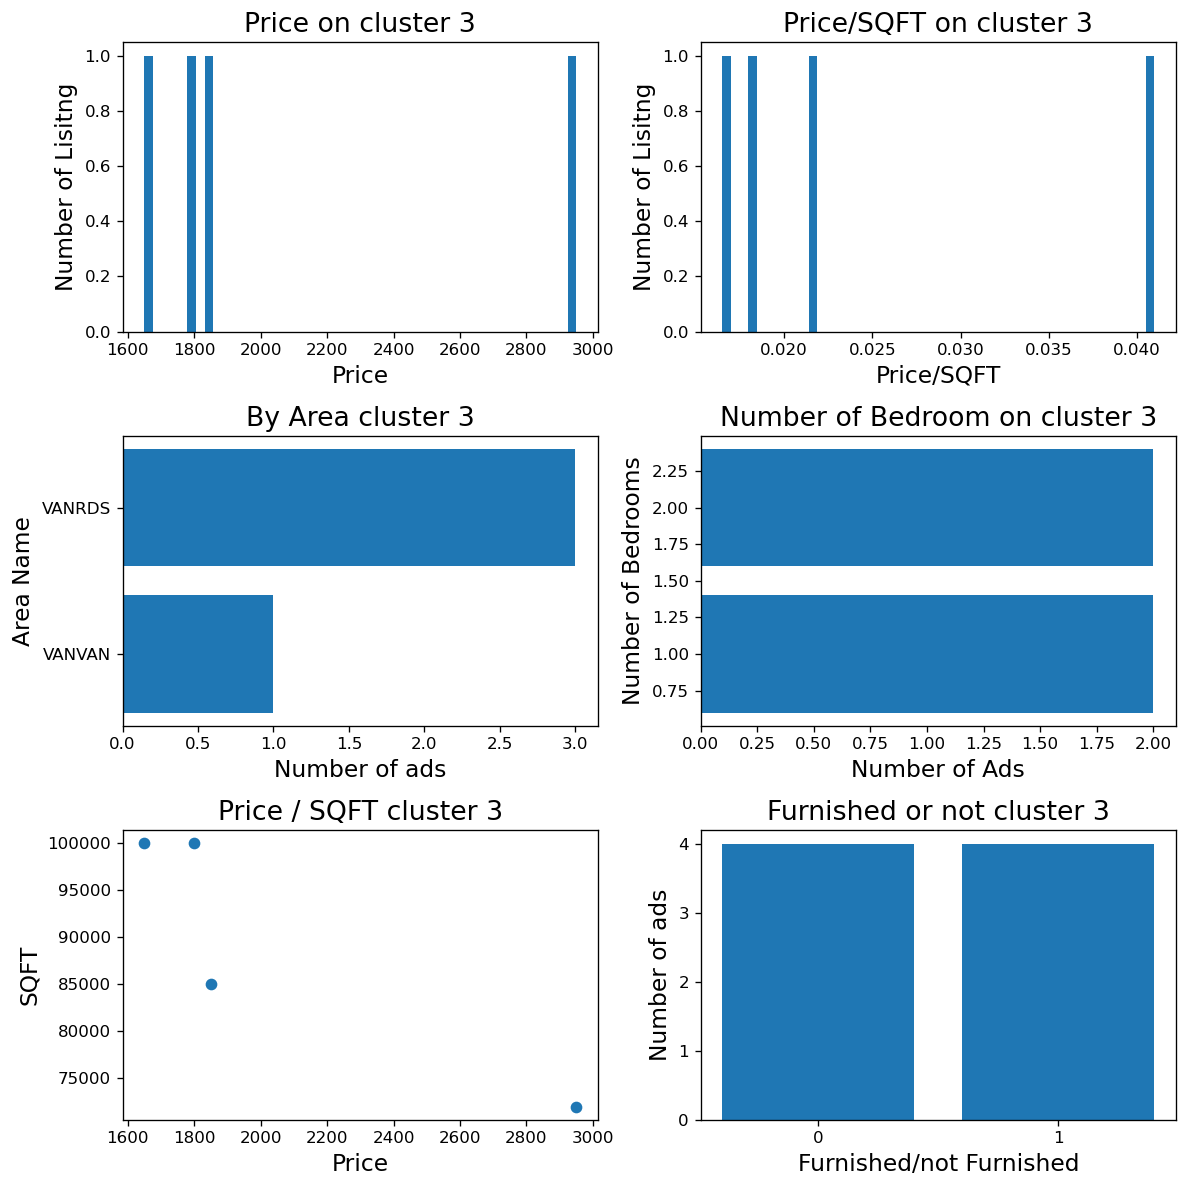

Correlation Matrix cluster 3: 
                PostArea_coded   Bedroom      SQFT     Price  IsFurnished  \
PostArea_coded        1.000000 -0.577350 -0.851852  0.989842          NaN   
Bedroom              -0.577350  1.000000  0.277983 -0.458798          NaN   
SQFT                 -0.851852  0.277983  1.000000 -0.894833          NaN   
Price                 0.989842 -0.458798 -0.894833  1.000000          NaN   
IsFurnished                NaN       NaN       NaN       NaN          NaN   
Price/SQFT            0.980702 -0.451276 -0.933825  0.994800          NaN   
cluster_labels             NaN       NaN       NaN       NaN          NaN   

                Price/SQFT  cluster_labels  
PostArea_coded    0.980702             NaN  
Bedroom          -0.451276             NaN  
SQFT             -0.933825             NaN  
Price             0.994800             NaN  
IsFurnished            NaN             NaN  
Price/SQFT        1.000000             NaN  
cluster_labels         NaN           

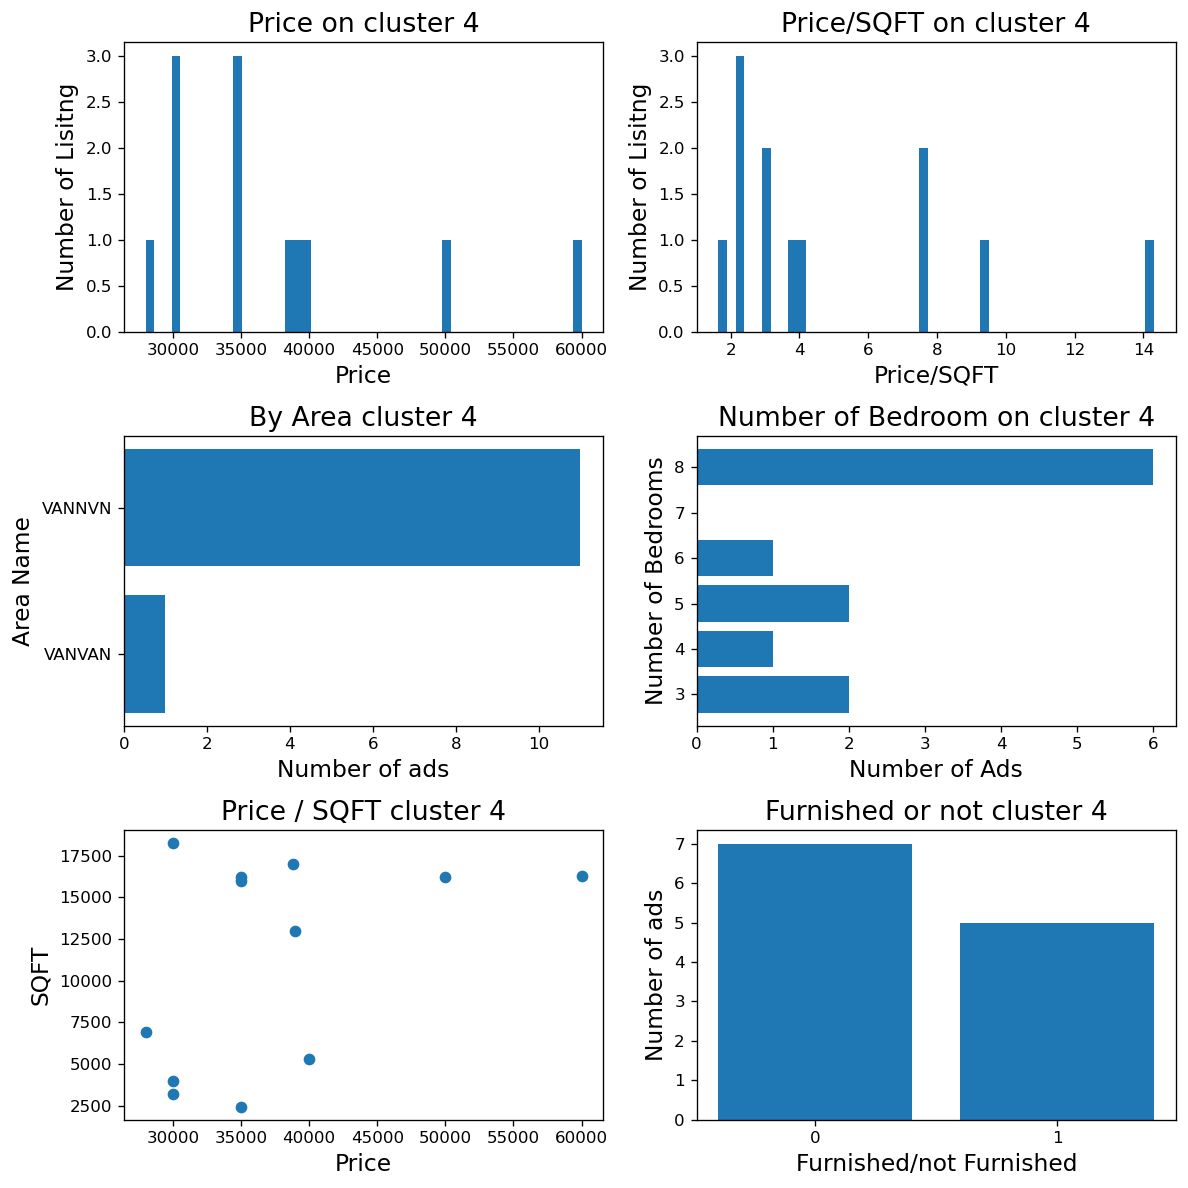

Correlation Matrix cluster 4: 
                PostArea_coded   Bedroom      SQFT     Price  IsFurnished  \
PostArea_coded        1.000000 -0.479059 -0.441518 -0.086894    -0.356753   
Bedroom              -0.479059  1.000000  0.972777  0.467469     0.325107   
SQFT                 -0.441518  0.972777  1.000000  0.425042     0.242058   
Price                -0.086894  0.467469  0.425042  1.000000     0.566480   
IsFurnished          -0.356753  0.325107  0.242058  0.566480     1.000000   
Price/SQFT            0.754479 -0.859408 -0.875989 -0.203964    -0.198953   
cluster_labels             NaN       NaN       NaN       NaN          NaN   

                Price/SQFT  cluster_labels  
PostArea_coded    0.754479             NaN  
Bedroom          -0.859408             NaN  
SQFT             -0.875989             NaN  
Price            -0.203964             NaN  
IsFurnished      -0.198953             NaN  
Price/SQFT        1.000000             NaN  
cluster_labels         NaN           

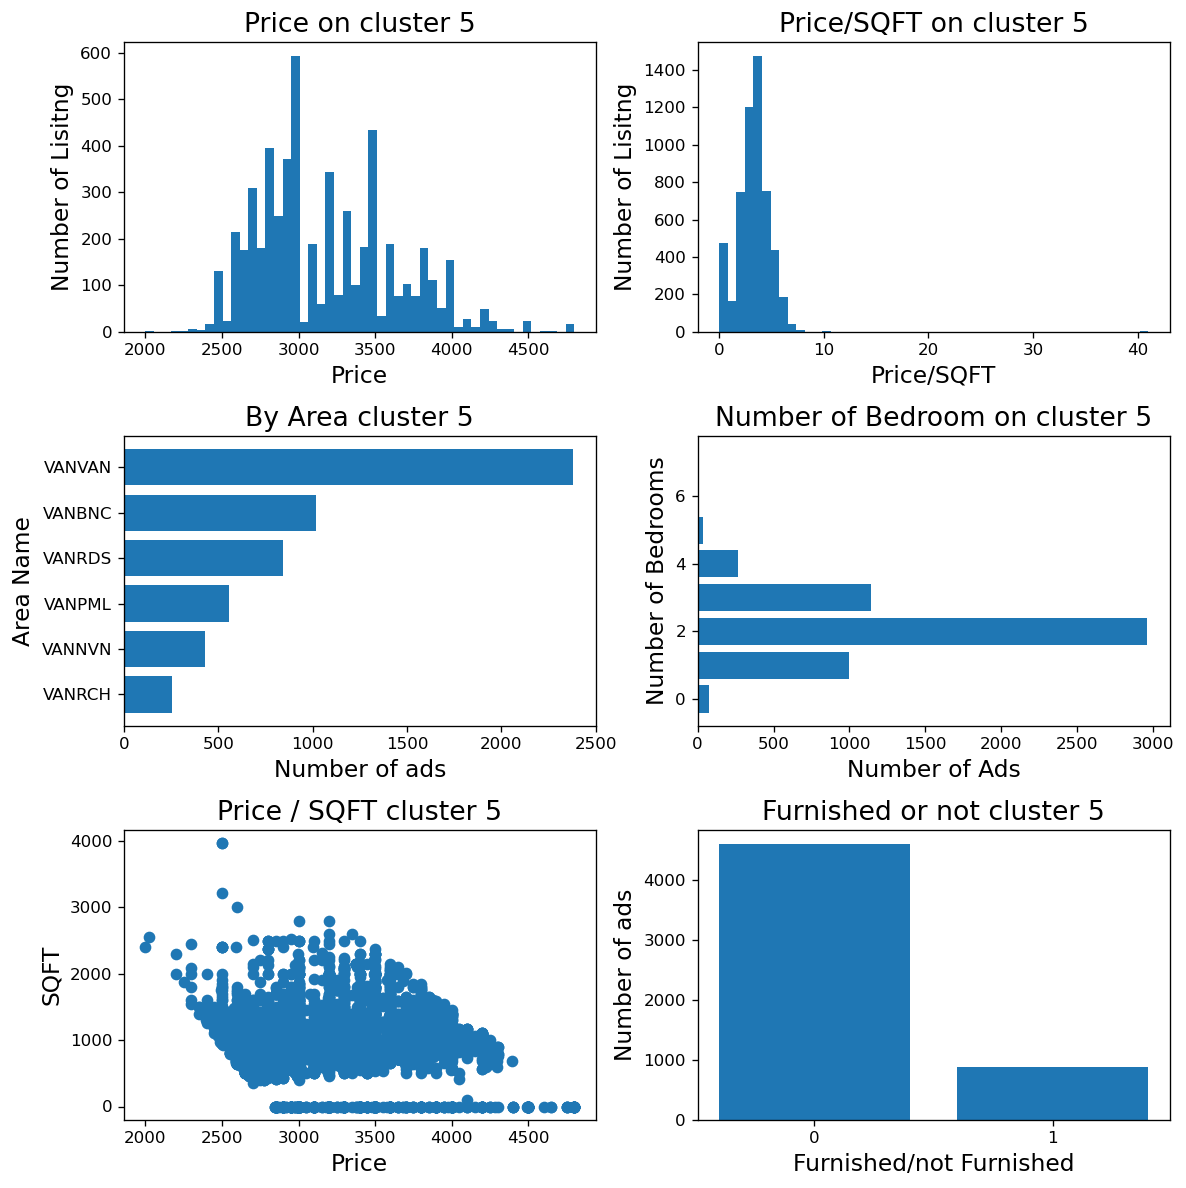

Correlation Matrix cluster 5: 
                PostArea_coded   Bedroom      SQFT     Price  IsFurnished  \
PostArea_coded        1.000000 -0.213928 -0.054836  0.106204     0.128841   
Bedroom              -0.213928  1.000000  0.498549 -0.109570    -0.254301   
SQFT                 -0.054836  0.498549  1.000000 -0.334281    -0.114657   
Price                 0.106204 -0.109570 -0.334281  1.000000     0.130153   
IsFurnished           0.128841 -0.254301 -0.114657  0.130153     1.000000   
Price/SQFT            0.103989 -0.117711 -0.055625  0.061895     0.063989   
cluster_labels             NaN       NaN       NaN       NaN          NaN   

                Price/SQFT  cluster_labels  
PostArea_coded    0.103989             NaN  
Bedroom          -0.117711             NaN  
SQFT             -0.055625             NaN  
Price             0.061895             NaN  
IsFurnished       0.063989             NaN  
Price/SQFT        1.000000             NaN  
cluster_labels         NaN           

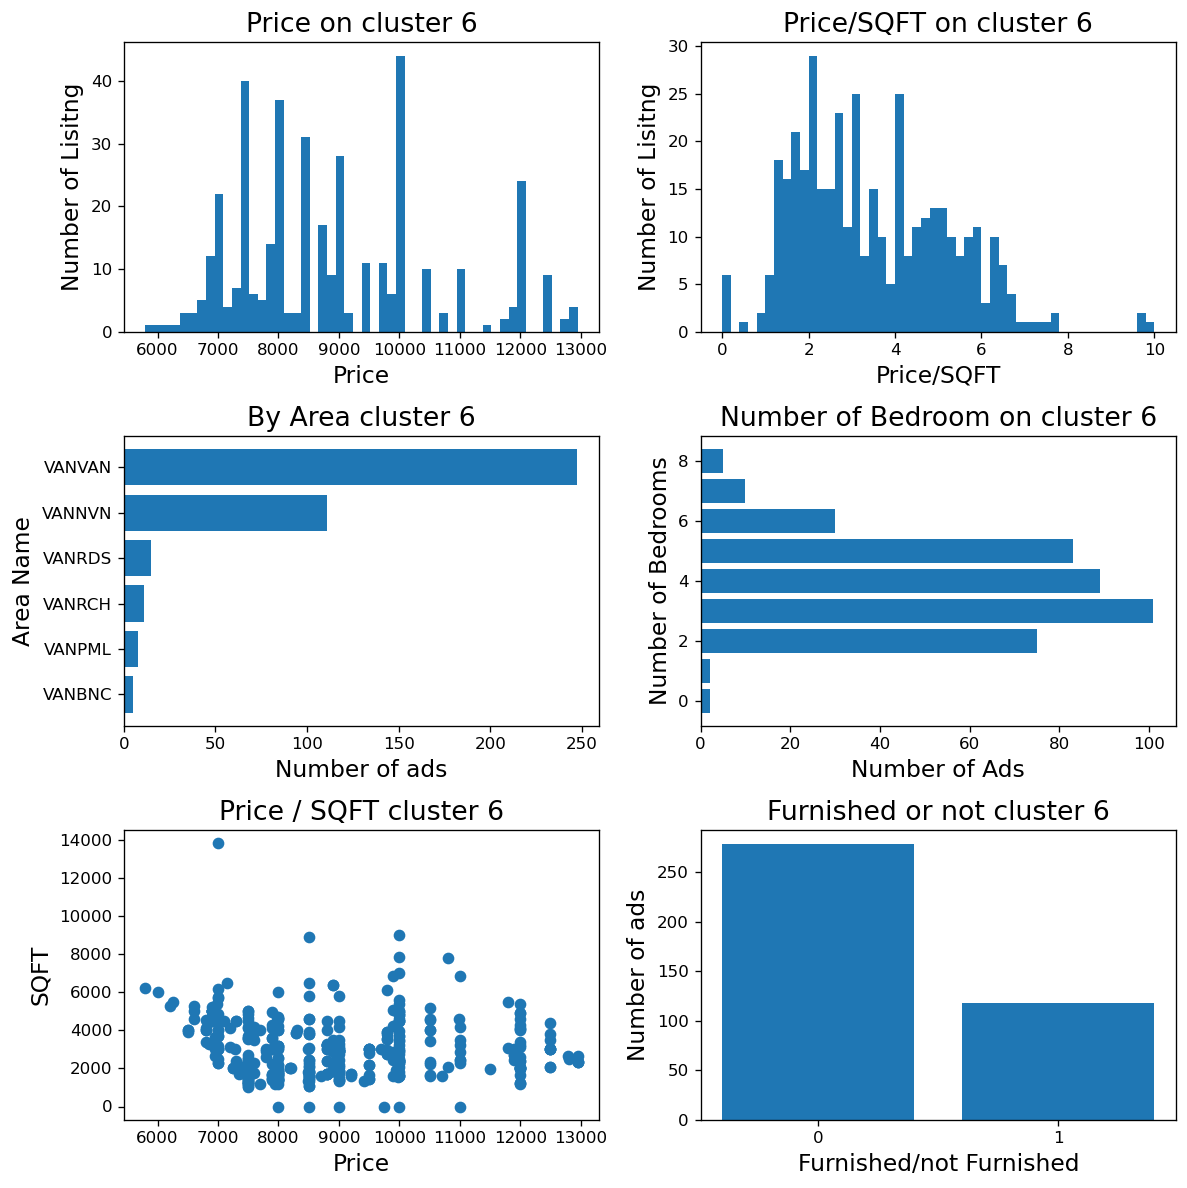

Correlation Matrix cluster 6: 
                PostArea_coded   Bedroom      SQFT     Price  IsFurnished  \
PostArea_coded        1.000000 -0.179377 -0.006066 -0.001874     0.182149   
Bedroom              -0.179377  1.000000  0.650029 -0.014048    -0.051832   
SQFT                 -0.006066  0.650029  1.000000 -0.008614     0.036645   
Price                -0.001874 -0.014048 -0.008614  1.000000     0.024575   
IsFurnished           0.182149 -0.051832  0.036645  0.024575     1.000000   
Price/SQFT            0.443373 -0.527083 -0.391002  0.142115     0.124393   
cluster_labels             NaN       NaN       NaN       NaN          NaN   

                Price/SQFT  cluster_labels  
PostArea_coded    0.443373             NaN  
Bedroom          -0.527083             NaN  
SQFT             -0.391002             NaN  
Price             0.142115             NaN  
IsFurnished       0.124393             NaN  
Price/SQFT        1.000000             NaN  
cluster_labels         NaN           

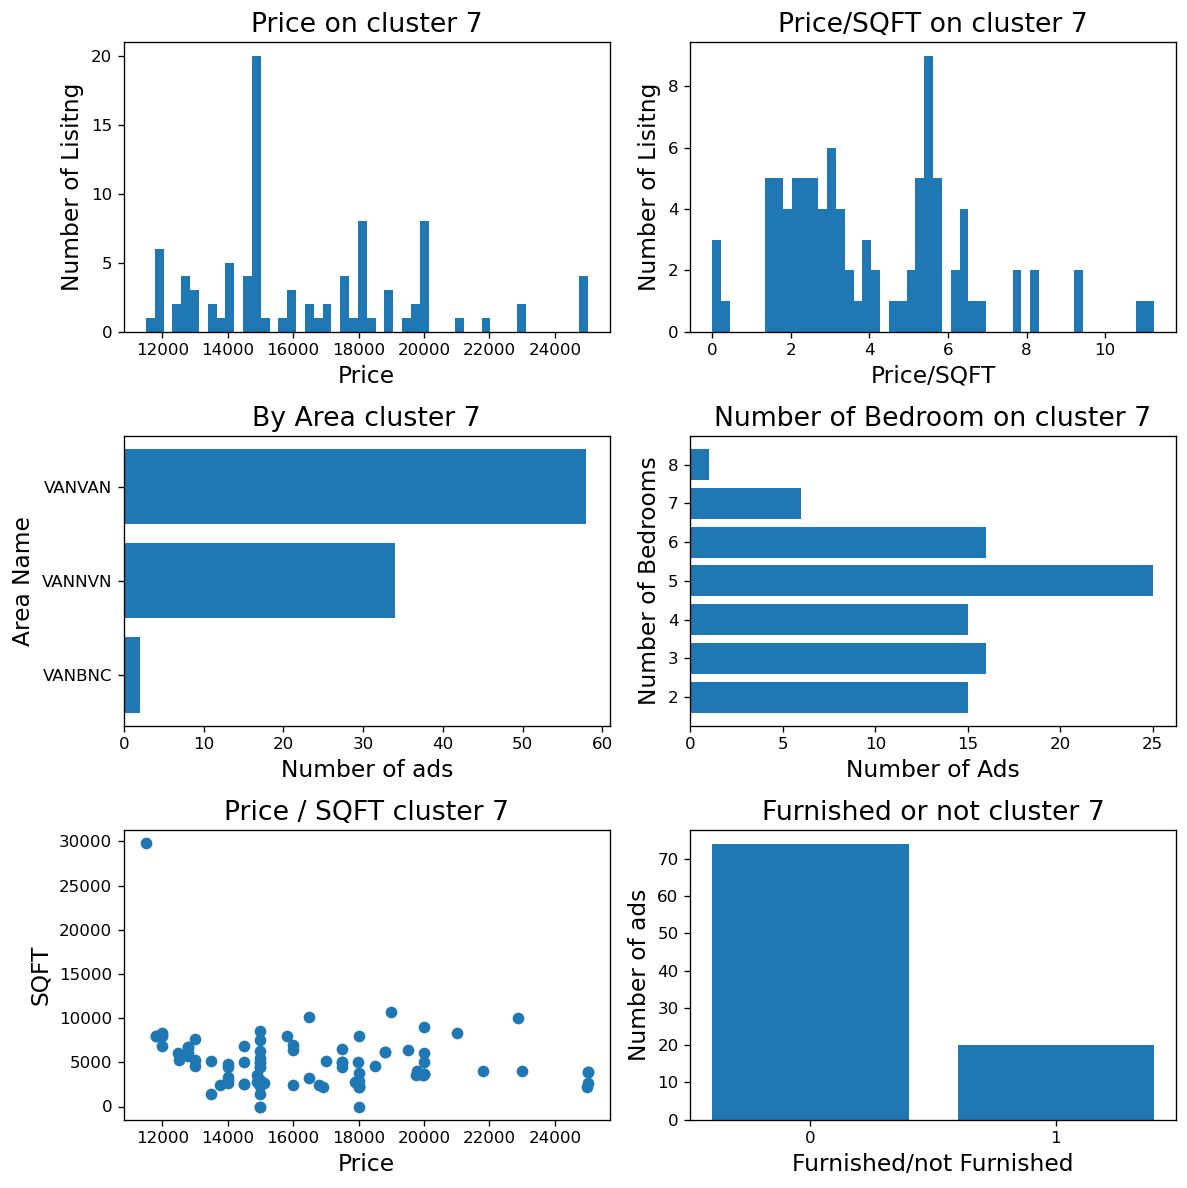

Correlation Matrix cluster 7: 
                PostArea_coded   Bedroom      SQFT     Price  IsFurnished  \
PostArea_coded        1.000000 -0.260394  0.175293 -0.037328     0.235584   
Bedroom              -0.260394  1.000000  0.080256  0.352622    -0.240528   
SQFT                  0.175293  0.080256  1.000000 -0.238170     0.006814   
Price                -0.037328  0.352622 -0.238170  1.000000    -0.022135   
IsFurnished           0.235584 -0.240528  0.006814 -0.022135     1.000000   
Price/SQFT            0.000817 -0.005887  0.005357 -0.016481     0.006961   
cluster_labels             NaN       NaN       NaN       NaN          NaN   

                Price/SQFT  cluster_labels  
PostArea_coded    0.000817             NaN  
Bedroom          -0.005887             NaN  
SQFT              0.005357             NaN  
Price            -0.016481             NaN  
IsFurnished       0.006961             NaN  
Price/SQFT        1.000000             NaN  
cluster_labels         NaN           

In [18]:
# Plot result by the cluster
for i in range(len(set(cluster_labels))):
    subplot_by_cluster(van_data, i)
    cluster = data[data['cluster_labels'] == i]
    print(f"Correlation Matrix cluster {i}: \n{cluster.corr()}")

In [19]:
van_data['IsFurnished'].value_counts()

0    11950
1     1997
Name: IsFurnished, dtype: int64

In [20]:
# Furnished percentage
non_furnished = len(van_data[van_data['IsFurnished'] == 0]) 
furnished = len(van_data[van_data['IsFurnished'] == 1])
percentage = furnished / (non_furnished + furnished)
percentage

0.14318491431849142

## Apply same thing to just Toronto data

In [21]:
# Run KMeans to categorize the properties
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X = pd.get_dummies(tor_data[["PostArea_coded", "Bedroom", "SQFT", "Price", "IsFurnished", "Price/SQFT"]])

scaler.fit(X)

kmeans = KMeans(n_clusters=8)

kmeans.fit(X)

cluster_labels = kmeans.predict(X)

print(cluster_labels)

[1 0 1 ... 1 1 7]


In [22]:
tor_data['cluster_labels'] = cluster_labels

C:\Users\Masa\AppData\Local\Temp\ipykernel_2148\2018389399.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tor_data['cluster_labels'] = cluster_labels


cluster_label: 0
Length of DataFrame: 452


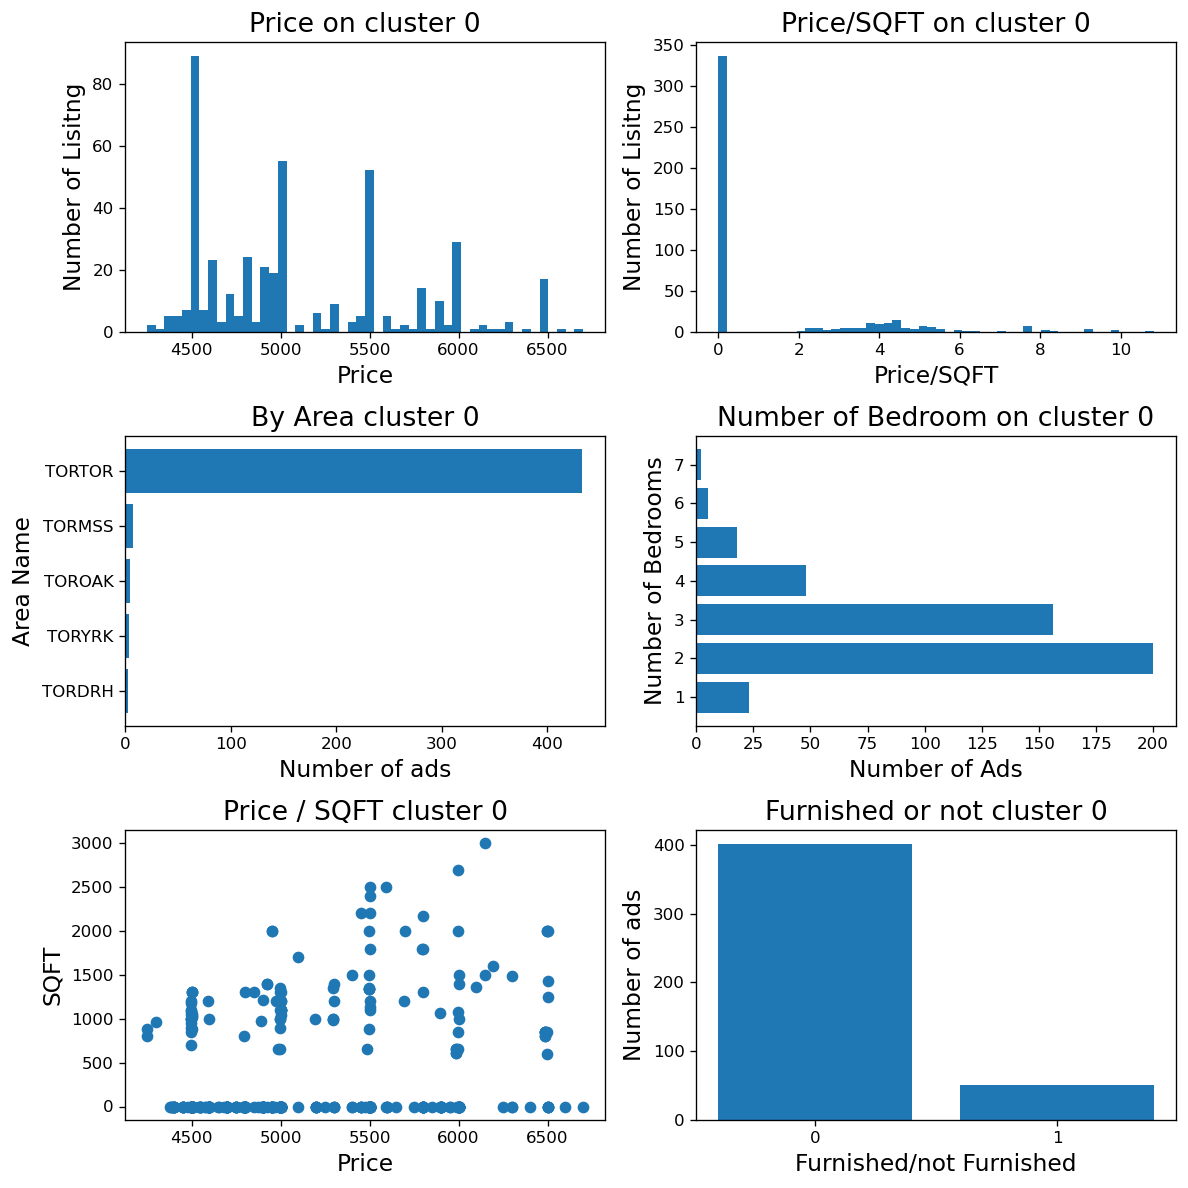

Correlation Matrix cluster 0: 
                PostArea_coded   Bedroom      SQFT     Price  IsFurnished  \
PostArea_coded        1.000000 -0.186308  0.015380  0.082044     0.101919   
Bedroom              -0.186308  1.000000  0.207311  0.068890    -0.112902   
SQFT                  0.015380  0.207311  1.000000  0.146394    -0.034320   
Price                 0.082044  0.068890  0.146394  1.000000    -0.048707   
IsFurnished           0.101919 -0.112902 -0.034320 -0.048707     1.000000   
Price/SQFT           -0.012180 -0.002382 -0.018457  0.006282    -0.005698   
cluster_labels             NaN       NaN       NaN       NaN          NaN   

                Price/SQFT  cluster_labels  
PostArea_coded   -0.012180             NaN  
Bedroom          -0.002382             NaN  
SQFT             -0.018457             NaN  
Price             0.006282             NaN  
IsFurnished      -0.005698             NaN  
Price/SQFT        1.000000             NaN  
cluster_labels         NaN           

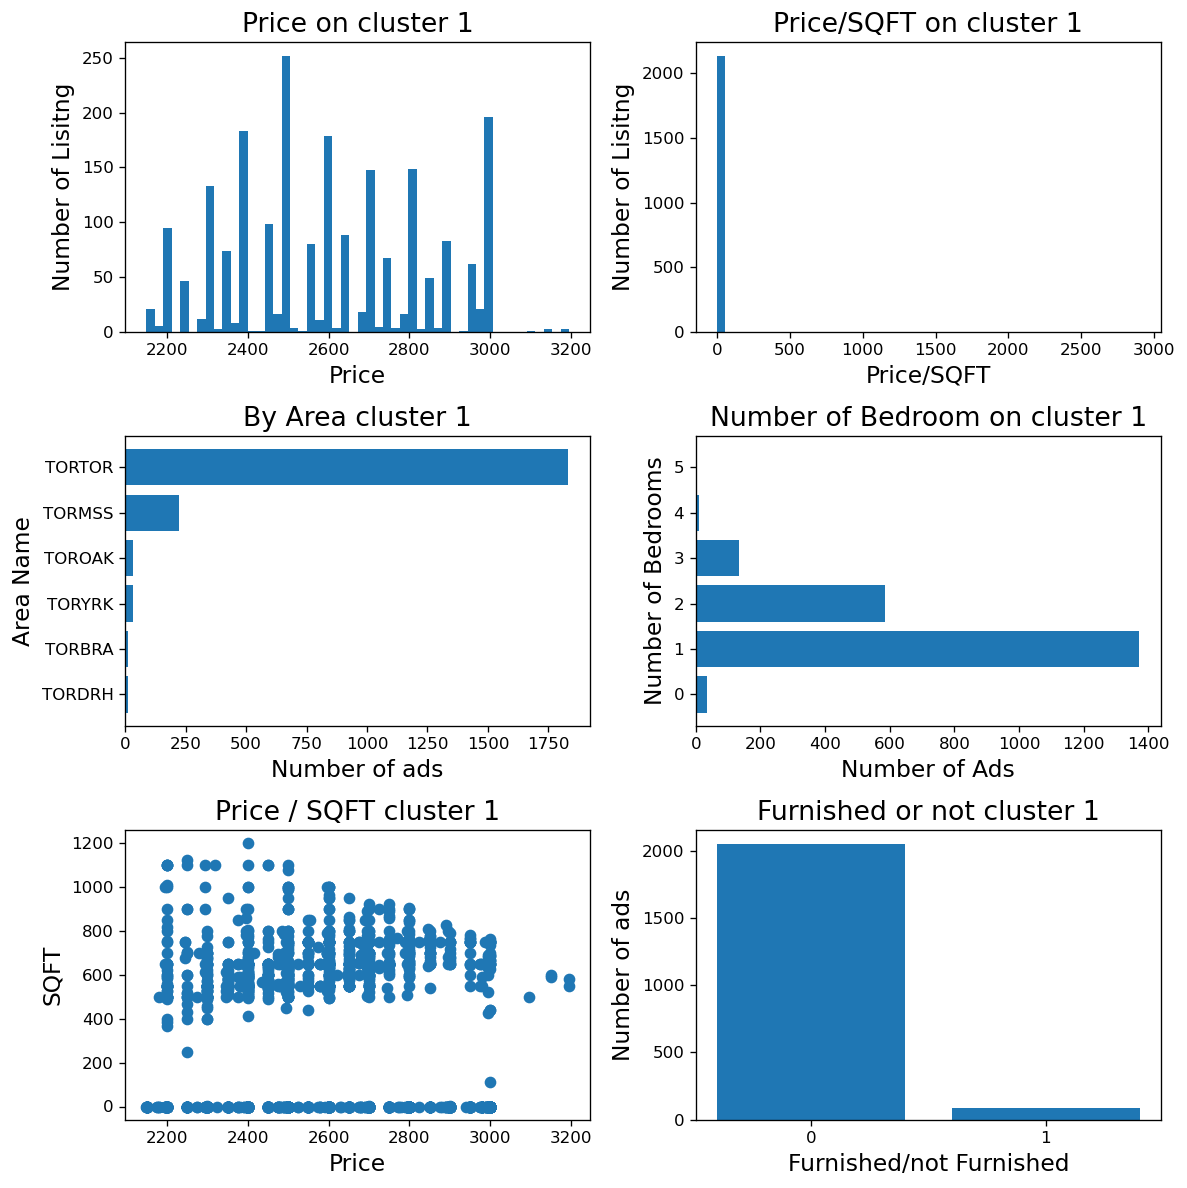

Correlation Matrix cluster 1: 
                PostArea_coded  Bedroom  SQFT  Price  IsFurnished  Price/SQFT  \
PostArea_coded             NaN      NaN   NaN    NaN          NaN         NaN   
Bedroom                    NaN      1.0   NaN    NaN          NaN         NaN   
SQFT                       NaN      NaN   NaN    NaN          NaN         NaN   
Price                      NaN      NaN   NaN    NaN          NaN         NaN   
IsFurnished                NaN      NaN   NaN    NaN          NaN         NaN   
Price/SQFT                 NaN      NaN   NaN    NaN          NaN         NaN   
cluster_labels             NaN      NaN   NaN    NaN          NaN         NaN   

                cluster_labels  
PostArea_coded             NaN  
Bedroom                    NaN  
SQFT                       NaN  
Price                      NaN  
IsFurnished                NaN  
Price/SQFT                 NaN  
cluster_labels             NaN  
cluster_label: 2
Length of DataFrame: 96


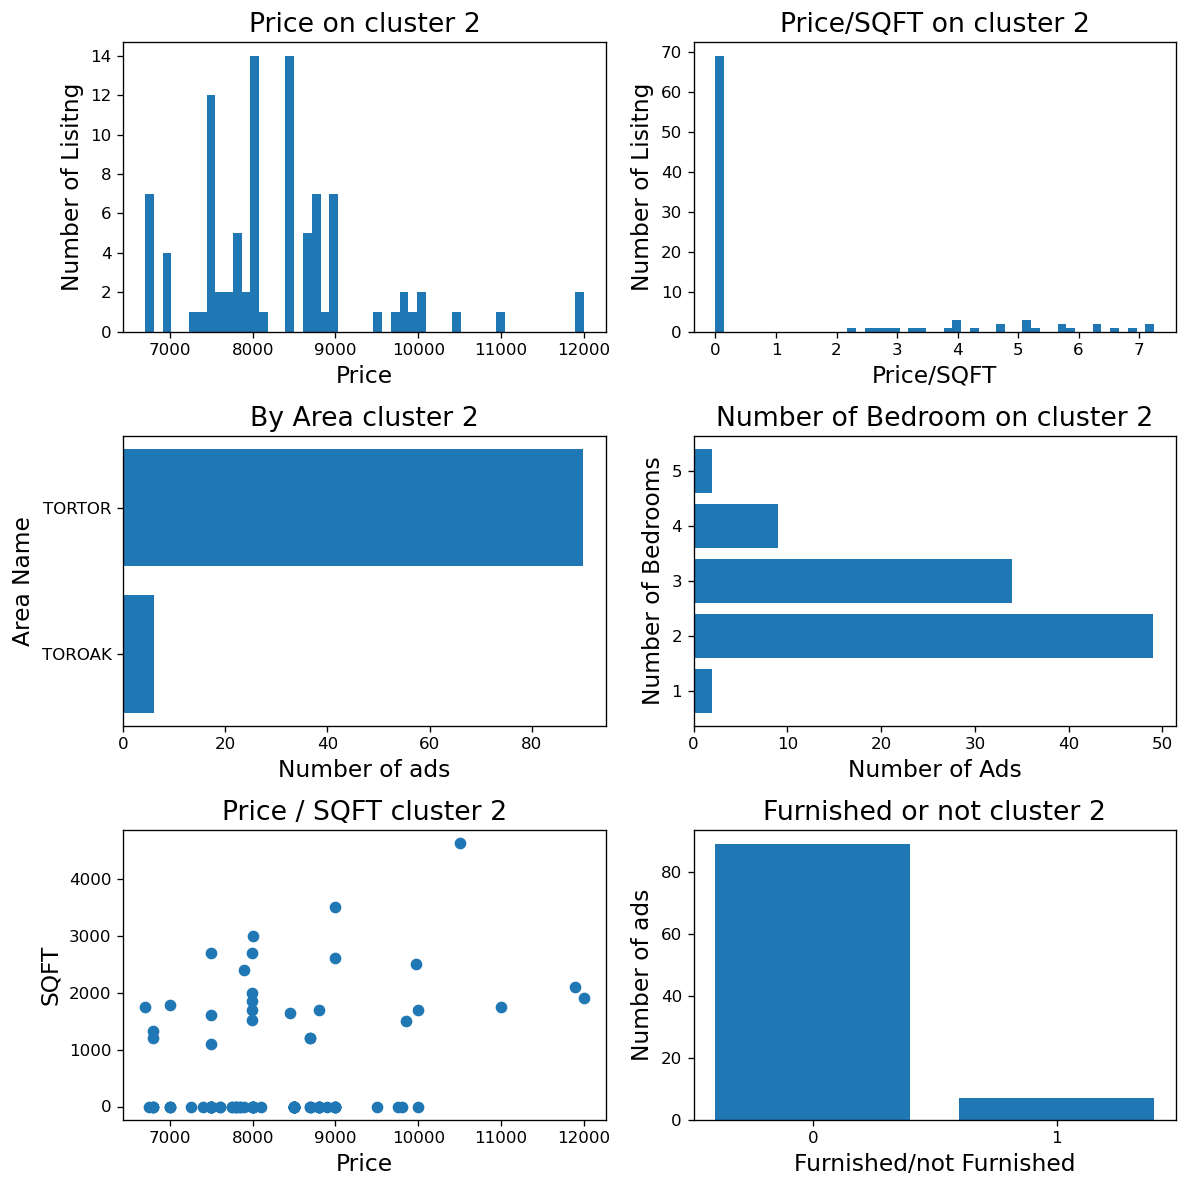

Correlation Matrix cluster 2: 
                PostArea_coded   Bedroom      SQFT     Price  IsFurnished  \
PostArea_coded        1.000000  0.034987  0.058919  0.040826     0.170619   
Bedroom               0.034987  1.000000  0.527854 -0.078051    -0.122782   
SQFT                  0.058919  0.527854  1.000000 -0.141659    -0.087746   
Price                 0.040826 -0.078051 -0.141659  1.000000     0.044788   
IsFurnished           0.170619 -0.122782 -0.087746  0.044788     1.000000   
Price/SQFT            0.365051 -0.433250 -0.251536  0.133317     0.292443   
cluster_labels             NaN       NaN       NaN       NaN          NaN   

                Price/SQFT  cluster_labels  
PostArea_coded    0.365051             NaN  
Bedroom          -0.433250             NaN  
SQFT             -0.251536             NaN  
Price             0.133317             NaN  
IsFurnished       0.292443             NaN  
Price/SQFT        1.000000             NaN  
cluster_labels         NaN           

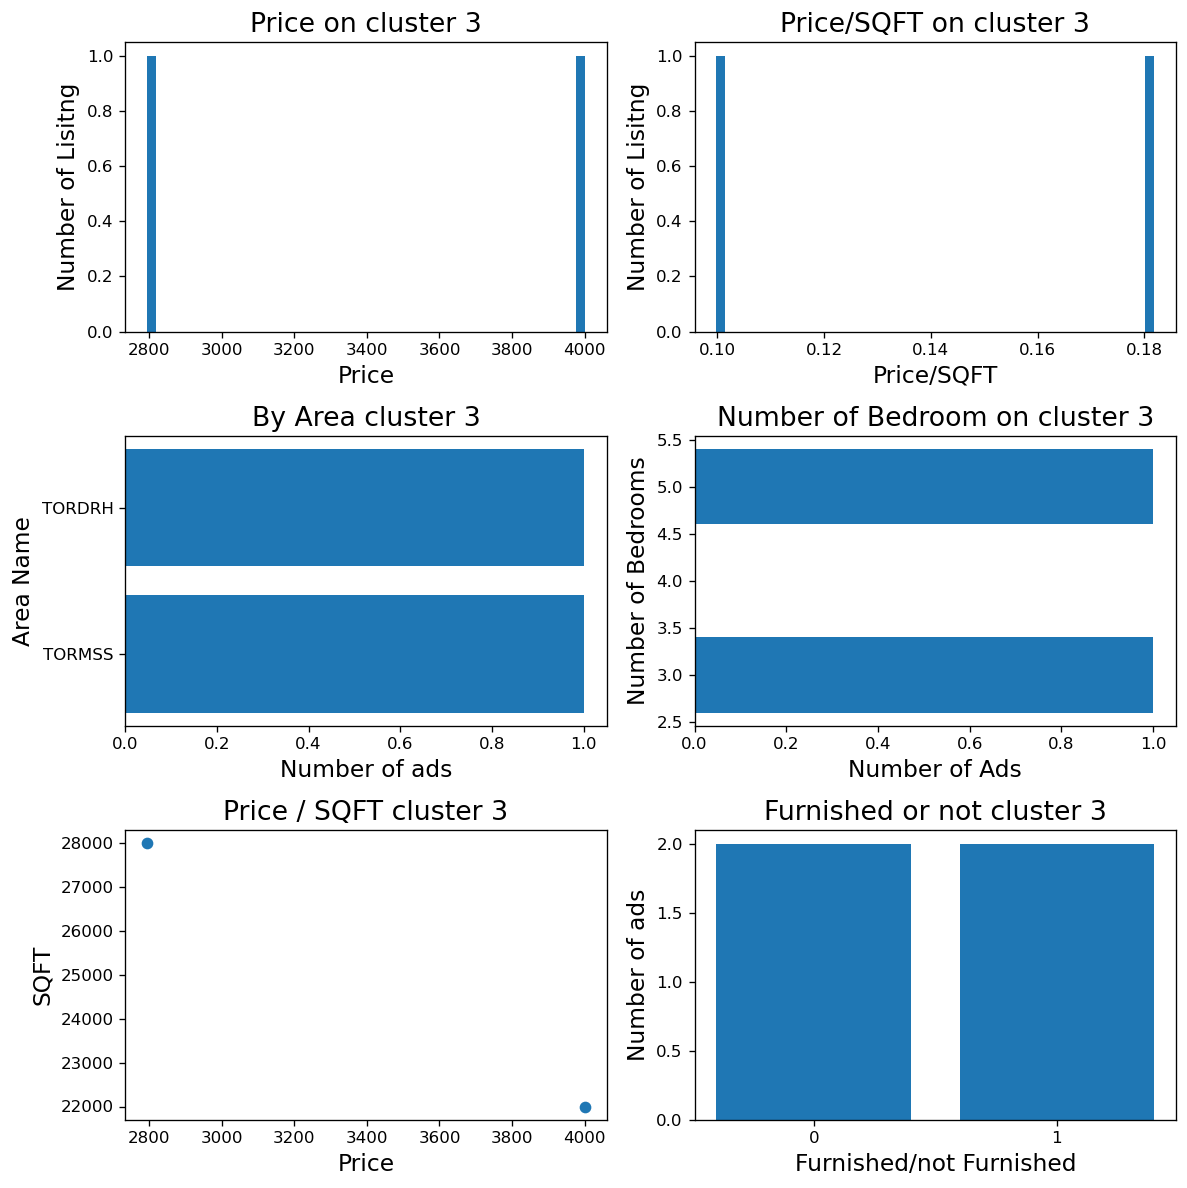

Correlation Matrix cluster 3: 
                PostArea_coded   Bedroom      SQFT     Price  IsFurnished  \
PostArea_coded        1.000000 -0.577350 -0.851852  0.989842          NaN   
Bedroom              -0.577350  1.000000  0.277983 -0.458798          NaN   
SQFT                 -0.851852  0.277983  1.000000 -0.894833          NaN   
Price                 0.989842 -0.458798 -0.894833  1.000000          NaN   
IsFurnished                NaN       NaN       NaN       NaN          NaN   
Price/SQFT            0.980702 -0.451276 -0.933825  0.994800          NaN   
cluster_labels             NaN       NaN       NaN       NaN          NaN   

                Price/SQFT  cluster_labels  
PostArea_coded    0.980702             NaN  
Bedroom          -0.451276             NaN  
SQFT             -0.933825             NaN  
Price             0.994800             NaN  
IsFurnished            NaN             NaN  
Price/SQFT        1.000000             NaN  
cluster_labels         NaN           

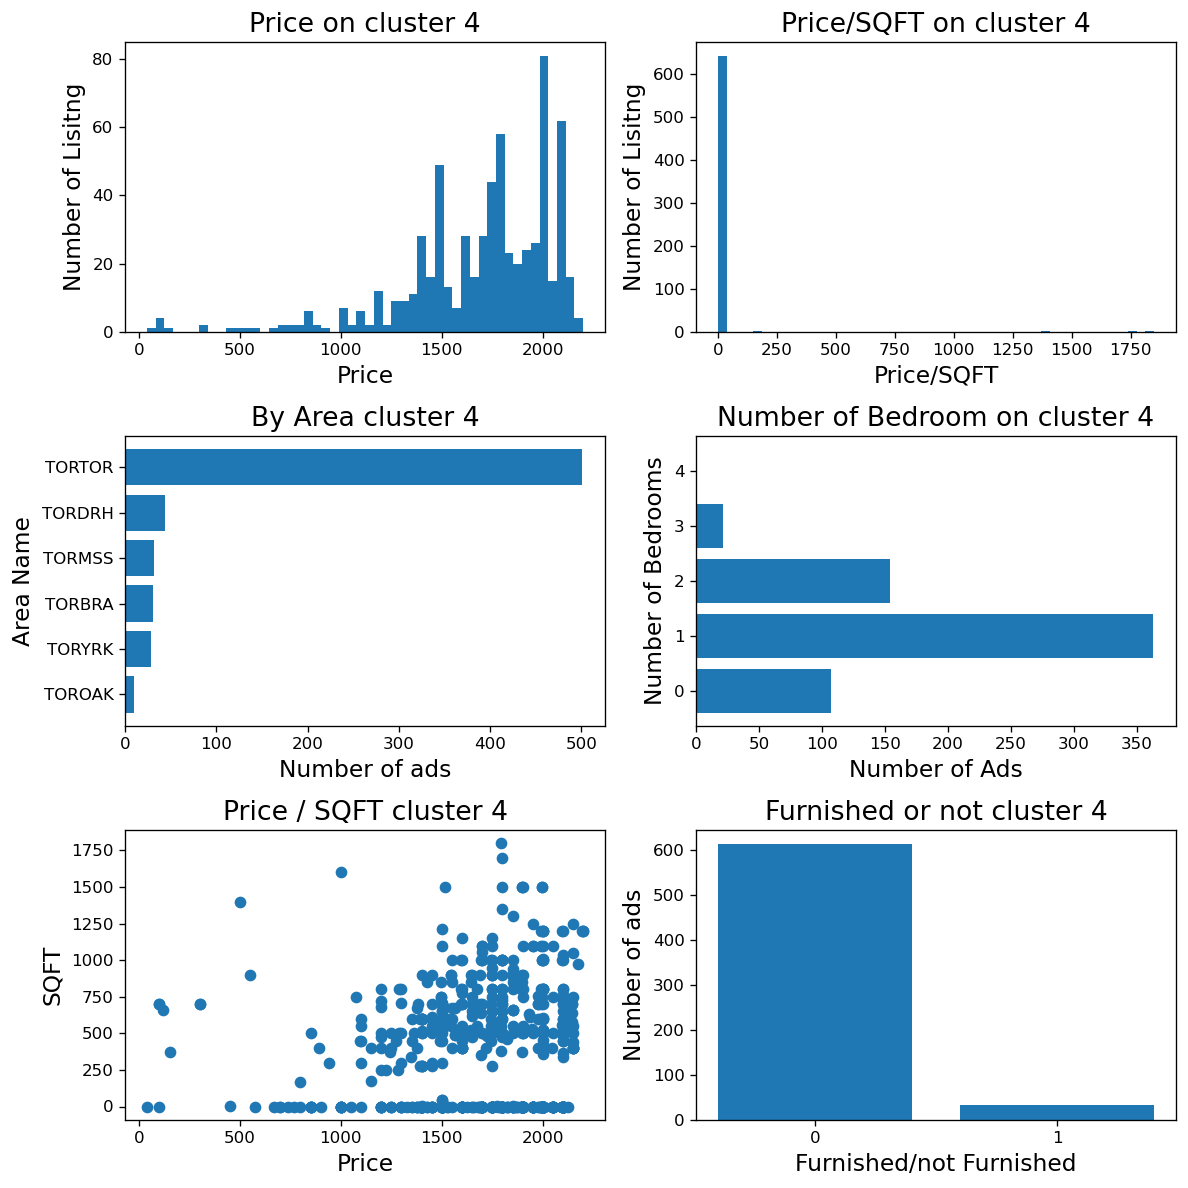

Correlation Matrix cluster 4: 
                PostArea_coded   Bedroom      SQFT     Price  IsFurnished  \
PostArea_coded        1.000000 -0.479059 -0.441518 -0.086894    -0.356753   
Bedroom              -0.479059  1.000000  0.972777  0.467469     0.325107   
SQFT                 -0.441518  0.972777  1.000000  0.425042     0.242058   
Price                -0.086894  0.467469  0.425042  1.000000     0.566480   
IsFurnished          -0.356753  0.325107  0.242058  0.566480     1.000000   
Price/SQFT            0.754479 -0.859408 -0.875989 -0.203964    -0.198953   
cluster_labels             NaN       NaN       NaN       NaN          NaN   

                Price/SQFT  cluster_labels  
PostArea_coded    0.754479             NaN  
Bedroom          -0.859408             NaN  
SQFT             -0.875989             NaN  
Price            -0.203964             NaN  
IsFurnished      -0.198953             NaN  
Price/SQFT        1.000000             NaN  
cluster_labels         NaN           

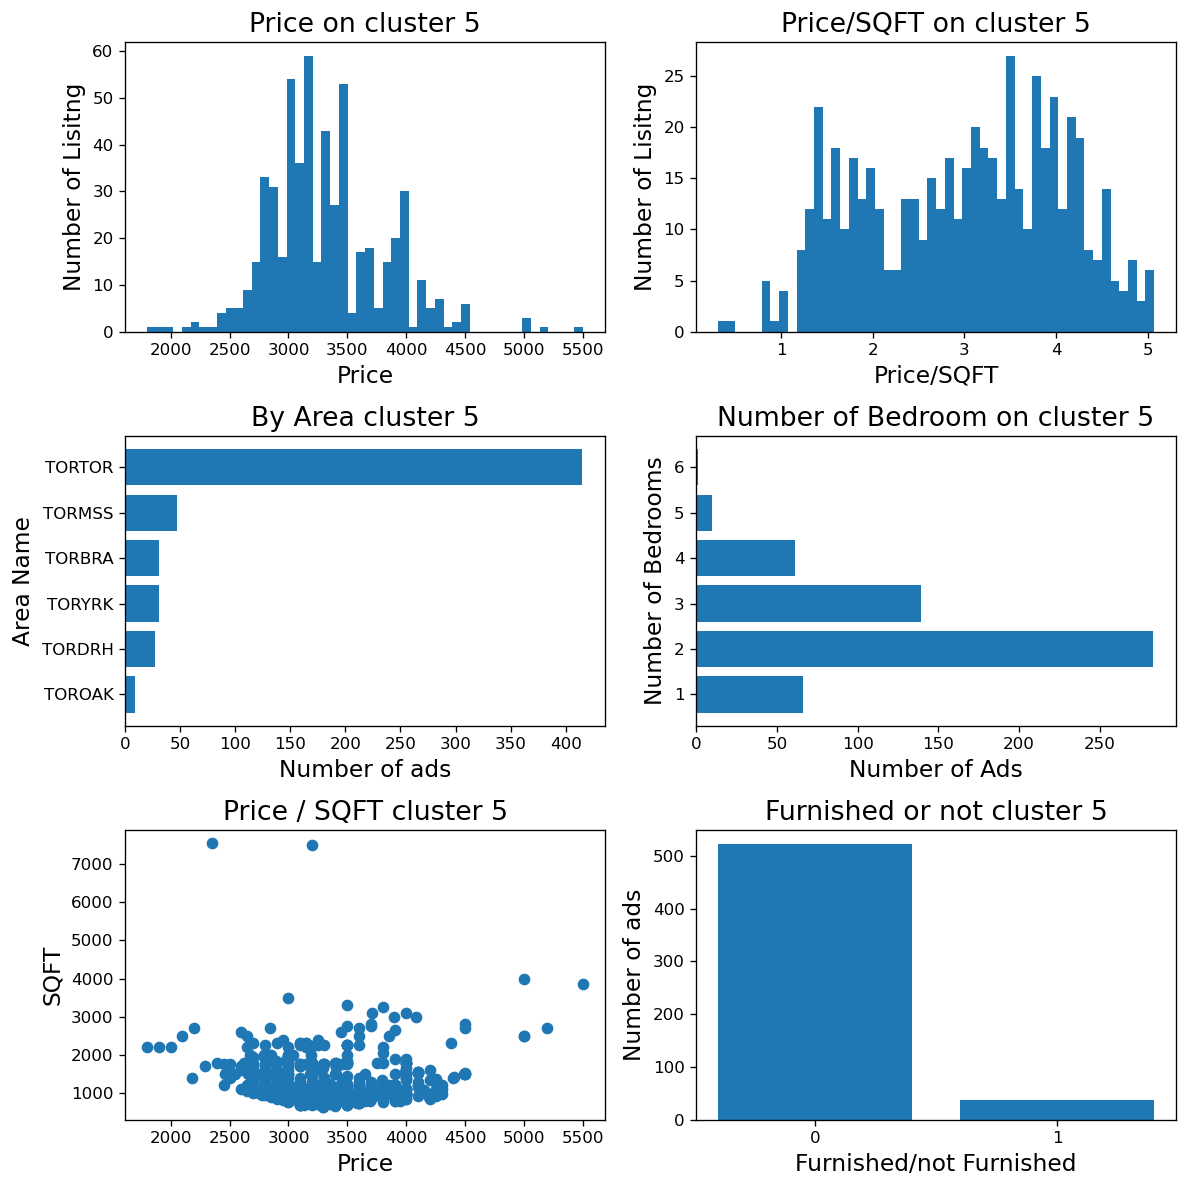

Correlation Matrix cluster 5: 
                PostArea_coded   Bedroom      SQFT     Price  IsFurnished  \
PostArea_coded        1.000000 -0.213928 -0.054836  0.106204     0.128841   
Bedroom              -0.213928  1.000000  0.498549 -0.109570    -0.254301   
SQFT                 -0.054836  0.498549  1.000000 -0.334281    -0.114657   
Price                 0.106204 -0.109570 -0.334281  1.000000     0.130153   
IsFurnished           0.128841 -0.254301 -0.114657  0.130153     1.000000   
Price/SQFT            0.103989 -0.117711 -0.055625  0.061895     0.063989   
cluster_labels             NaN       NaN       NaN       NaN          NaN   

                Price/SQFT  cluster_labels  
PostArea_coded    0.103989             NaN  
Bedroom          -0.117711             NaN  
SQFT             -0.055625             NaN  
Price             0.061895             NaN  
IsFurnished       0.063989             NaN  
Price/SQFT        1.000000             NaN  
cluster_labels         NaN           

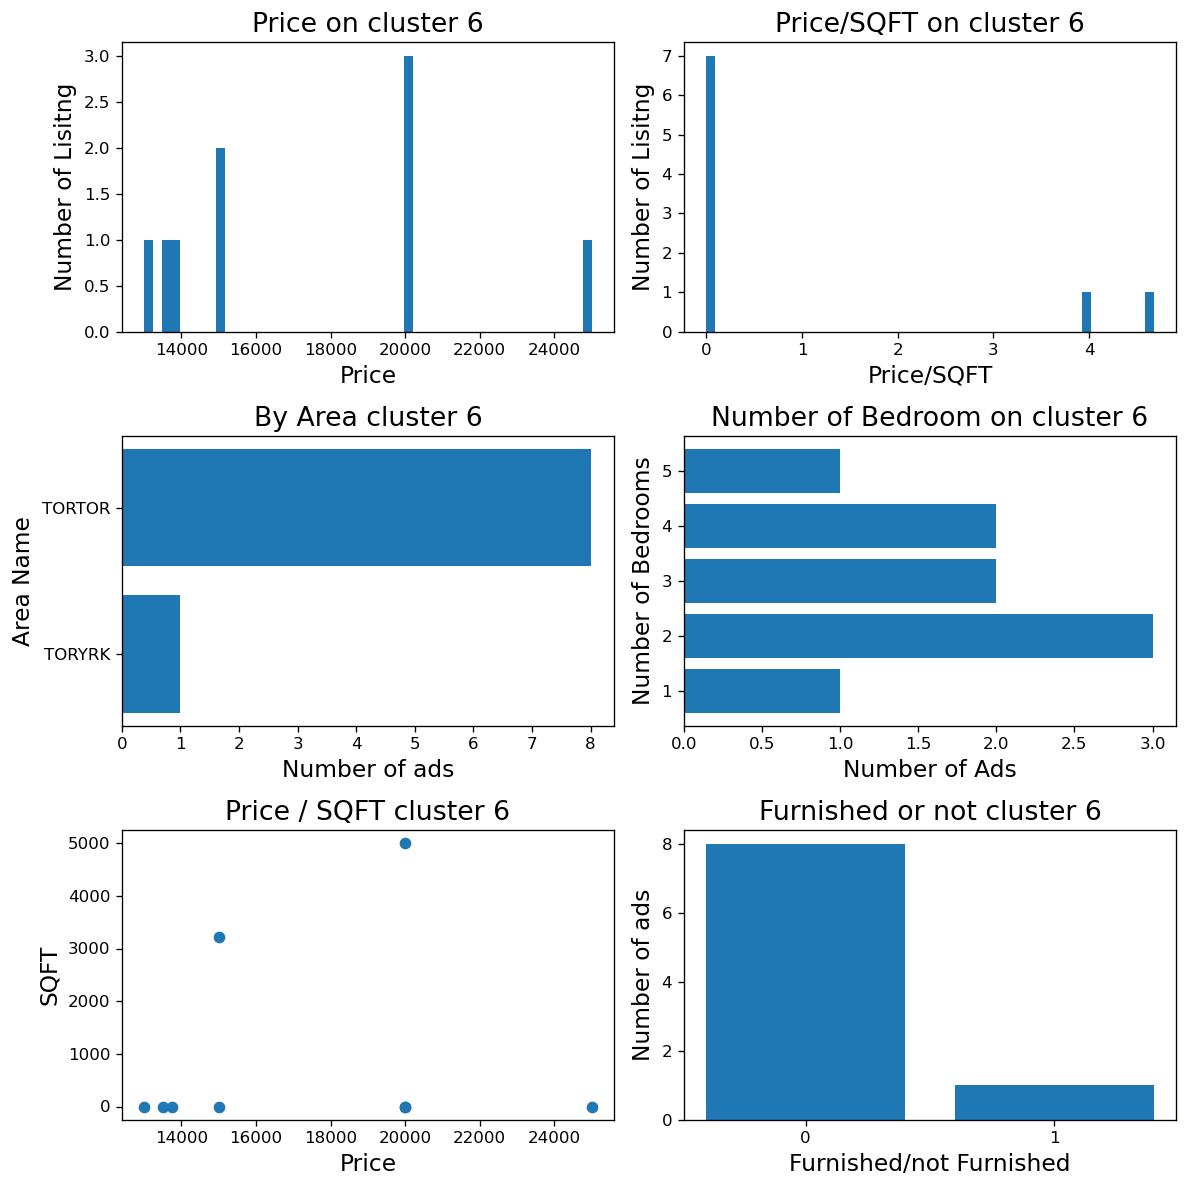

Correlation Matrix cluster 6: 
                PostArea_coded   Bedroom      SQFT     Price  IsFurnished  \
PostArea_coded        1.000000 -0.179377 -0.006066 -0.001874     0.182149   
Bedroom              -0.179377  1.000000  0.650029 -0.014048    -0.051832   
SQFT                 -0.006066  0.650029  1.000000 -0.008614     0.036645   
Price                -0.001874 -0.014048 -0.008614  1.000000     0.024575   
IsFurnished           0.182149 -0.051832  0.036645  0.024575     1.000000   
Price/SQFT            0.443373 -0.527083 -0.391002  0.142115     0.124393   
cluster_labels             NaN       NaN       NaN       NaN          NaN   

                Price/SQFT  cluster_labels  
PostArea_coded    0.443373             NaN  
Bedroom          -0.527083             NaN  
SQFT             -0.391002             NaN  
Price             0.142115             NaN  
IsFurnished       0.124393             NaN  
Price/SQFT        1.000000             NaN  
cluster_labels         NaN           

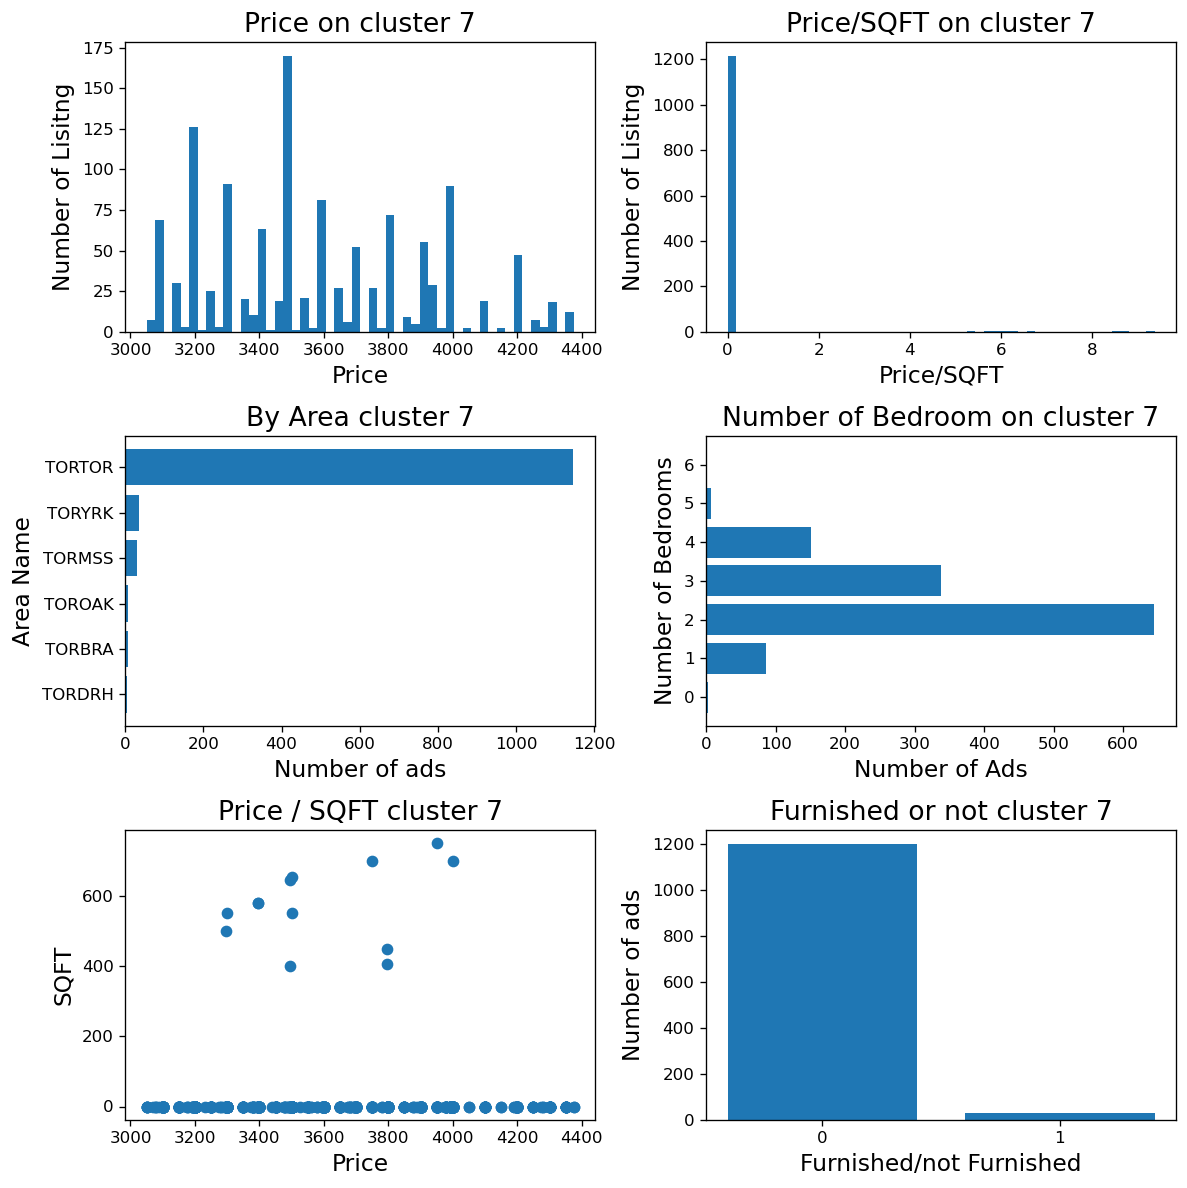

Correlation Matrix cluster 7: 
                PostArea_coded   Bedroom      SQFT     Price  IsFurnished  \
PostArea_coded        1.000000 -0.260394  0.175293 -0.037328     0.235584   
Bedroom              -0.260394  1.000000  0.080256  0.352622    -0.240528   
SQFT                  0.175293  0.080256  1.000000 -0.238170     0.006814   
Price                -0.037328  0.352622 -0.238170  1.000000    -0.022135   
IsFurnished           0.235584 -0.240528  0.006814 -0.022135     1.000000   
Price/SQFT            0.000817 -0.005887  0.005357 -0.016481     0.006961   
cluster_labels             NaN       NaN       NaN       NaN          NaN   

                Price/SQFT  cluster_labels  
PostArea_coded    0.000817             NaN  
Bedroom          -0.005887             NaN  
SQFT              0.005357             NaN  
Price            -0.016481             NaN  
IsFurnished       0.006961             NaN  
Price/SQFT        1.000000             NaN  
cluster_labels         NaN           

In [23]:
# Plot result by the cluster
for i in range(len(set(cluster_labels))):
    subplot_by_cluster(tor_data, i)
    cluster = data[data['cluster_labels'] == i]
    print(f"Correlation Matrix cluster {i}: \n{cluster.corr()}")

In [24]:
tor_data['IsFurnished'].value_counts()

0    4890
1     243
Name: IsFurnished, dtype: int64

In [25]:
# Furnished percentage
non_furnished = len(tor_data[tor_data['IsFurnished'] == 0]) 
furnished = len(tor_data[tor_data['IsFurnished'] == 1])
percentage = furnished / (non_furnished + furnished)
percentage

0.04734073641145529

## Conclusion:

The purpose of this analyze is to categorize the properties to find the pattern of rent price for farther analysis, however I couldn't find any significant pattern. 

Same as project 1, I need to specify the area to find out the rental price. With this data, I can't specify the area therefore it is not ideal to get the rental price or compare with other variables I get. 

One findings with this analysis: Vancouver has higher ratio to find furnished suite than entire data. It makes me think that Vancouver has more short term renting suite than oterh regions. From project 1, you can charge more in rent with furnished suite. You might have opportuinity to increase the rent in other regions with furnished the suite. Less listing means less supply, so you can be the one who supplies furnished suite for demand and increase your rent revenue. 